<a href="https://colab.research.google.com/github/centeno/covid-impact-scrapper/blob/master/step03_3_pnl_multivocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
# Install

#!apt-get update # to update ubuntu to correctly run apt install

# get domains
# https://pypi.org/project/tld/
#!pip install tld

# geocod
#!pip install geopy

# dataviz
#!pip install --upgrade plotly
#!pip install jupyter-dash
#!pip install raceplotly

#!pip install "gensim==3.8.1"
#!pip install nltk
#!pip install texthero
#!pip install pycaret

#bert
#!pip install transformers
#!pip install bert-extractive-summarizer

#Ktrain
#!pip install numpy>=1.20.0
#!pip install tensorflow
#!pip3 install ktrain

#packages
#!python -m spacy download en_core_web_sm
#!python -m spacy download pt_core_web_sm
#!python -m textblob.download_corpora

# spacy
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en
#!python -m spacy download pt
#!python -m spacy download en_core_web_sm

# Country converter
#! pip install country_converter --upgrade

# Contextual spell correction with spacy and bert
#!pip install contextualSpellCheck


# Sentiment analysis
#!pip install text2emotion

#Python library for interactive topic model visualization
#!pip install pyLDAvis


# IMPORT

In [ ]:
# Manipulação e visualização de dados
import os
import re
import sys
import glob
import socket
import urllib
import datetime
import numpy as np
import pandas as pd
from time import sleep


#dataviz
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 


# Com o NLTK fazemos Processamento de Linguagem Natural
import nltk
import spacy
import string

# get domain
import tld
from tld import get_tld, get_fld


# PLN
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import spacy
import string
import texthero as hero
from texthero import preprocessing
import ktrain
from ktrain import text


# Definimos o parâmetro abaixo para evitar o erro:
# RecursionError: maximum recursion depth exceeded
# Ao gravar os resultados em disco
sys.setrecursionlimit(50000)

%matplotlib inline


#https://discuss.analyticsvidhya.com/t/how-to-display-full-dataframe-in-pandas/23298/3
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Vamos desativar isso.
import sys
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# INPUT

## get grey

In [ ]:
path1 = "/home/eluis/workspace/covid19impact/data/01_grey/2020/03_pnl/"

In [ ]:
#combine all files in the list
df_grey = pd.read_csv(path1+'step03_pnl_grey_v1.csv', sep=';', parse_dates=["date"], engine="python", encoding='UTF-8')

In [ ]:
print(df_grey.shape);
df_grey.head(2)

(1116, 93)


Unnamed: 0  level_0  index  Unnamed: 0.1 type_study       date  year  \
0           0        0      0          1871       grey 2019-11-26  2019   
1           1        1      2          2914       grey 2019-12-14  2019   

   month                                             header  \
0     11                     annual report - CARE's Ratings   
1     12  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...            1   
1  https://www.zsah.net/technology-fight-coronavi...            1   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  ['annual', 'report', 'cares', 'ratings', 'rati...   
1  ['ways', 'technology', 'helping', 'fight', 'co...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-titl

In [ ]:
df_grey = df_grey.drop(['Unnamed: 0','Unnamed: 0.1','level_0','index'], axis=1)

In [ ]:
df_grey = df_grey.reset_index()

In [ ]:
print(df_grey.shape); df_grey.head(2)

(1116, 90)


index type_study       date  year  month  \
0      0       grey 2019-11-26  2019     11   
1      1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...            1   
1  https://www.zsah.net/technology-fight-coronavi...            1   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  ['annual', 'report', 'cares', 'ratings', 'rati...   
1  ['ways', 'technology', 'helping', 'fight', 'co...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0                   0                        1             1    1 

## get white

In [ ]:
path2 = "/home/eluis/workspace/covid19impact/data/02_white/step03_pnl/"

In [ ]:
#combine all files in the list
df_white = pd.read_csv(path2+'step03_pnl_white_v1.csv', sep=';', parse_dates=["date"], engine="python", encoding='UTF-8')

In [ ]:
print(df_white.shape);
df_white.head(2)

(14, 78)


Unnamed: 0  level_0  index type_study  \
0           0        0      5      white   
1           1        1      8      white   

                                              header  \
0  A Comprehensive Review of the COVID-19 Pandemi...   
1  The impact of the COVID-19 pandemic on firms: ...   

                                     author_keywords  \
0  Coronavirus;COVID-19;pandemic;transmission sta...   
1                                                NaN   

                                      index_keywords  \
0  COVID-19;Viruses (medical);Pandemics;Artificia...   
1                                                NaN   

                                             summary  \
0  The unprecedented outbreak of the 2019 novel c...   
1  The COVID-19 pandemic has affected all sectors...   

                                                link          base  \
0  https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...  ieee explore   
1  http://link.springer.com/article/10.1186/s4125...      springer   

                                        authors  \
0  V. Chamola; V. Hassija; V. Gupta; M. Guizani   
1                         Peng ZouDi HuoMeng Li   

                   publication_title  \
0                        IEEE Access   
1  Global Health Research and Policy   

                                            endereco  status1-selecao  \
0       Vidya Vihar, Pilani, Rajasthan 333031, Índia                1   
1  92 Xidazhi St, Nangang, Harbin, Heilongjiang, ...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0                   0                        1             1  1.0  0.0   
1                   0                        1             1  1.0  0.0   

  rq2.1_fase_citada                                                rq3  \
0               NaN  internet das coisas (IoT) veículos aéreos não ...   
1               NaN  produtividade e-commerce trabalho remoto trans...   

                                            all_tags conotação tipo_porte  \
0  internet das coisas (IoT);veículos aéreos não ...     mista    empresa   
1  produtividade;e-commerce;trabalho remoto;trans...     mista        NaN   

     setor                                         observação  \
0  privado  ver linha do tempo; ver 4 estágios da epdemiol...   
1    misto                                                NaN   

   publication_year document_identifier       date  \
0              2020       IEEE Journals 2020-05-04   
1              2020             Article 2020-09-02   

                                            location  \
0                Vidyavihar, Rajasthan 333031, India   
1  92 Xidazhi St, Nangang Qu, Haerbin Shi, Heilon...   

                               geometry   Latitude   Longitude  Altitude  \
0         (28.3688234, 75.5829782, 0.0)  28.368823   75.582978       0.0   
1  (45.74579989999999, 126.631471, 0.0)  45.745800  126.631471       0.0   

   year  month  quarter  day  day_of_week   shock_wave     host_name  \
0  2020      5        2    4            0  COVID-shock      ieee.org   
1  2020      9        3    2            2  COVID-shock  springer.com   

   page_rank                                  text_context_true  \
0          1  A Comprehensive Review of the COVID-19 Pandemi...   
1          1  The impact of the COVID-19 pandemic on firms: ...   

                          text_context_true_wo_punct  \
0  A Comprehensive Review of the COVID19 Pandemic...   
1  The impact of the COVID19 pandemic on firms a ...   

                    text_context_true_wo_punct_clean  \
0   comprehensive review covid19 pandemic role io...   
1   impact covid19 pandemic firms survey guangdon...   

              text_context_true_wo_punct_clean_token  \
0  ['comprehensive', 'review', 'pandemic', 'role'...   
1  ['impact', 'pandemic', 'firms', 'survey', 'gua...   

               text_context_true_wo_punct_clean_stem  \
0  comprehens review covid19 pandem role iot dron...   
1  impact covid

In [ ]:
df_white = df_white.drop(['Unnamed: 0','level_0','index'], axis=1)

In [ ]:
df_white = df_white.reset_index()

In [ ]:
print(df_white.shape);
df_white.head(2)

(14, 76)


index type_study                                             header  \
0      0      white  A Comprehensive Review of the COVID-19 Pandemi...   
1      1      white  The impact of the COVID-19 pandemic on firms: ...   

                                     author_keywords  \
0  Coronavirus;COVID-19;pandemic;transmission sta...   
1                                                NaN   

                                      index_keywords  \
0  COVID-19;Viruses (medical);Pandemics;Artificia...   
1                                                NaN   

                                             summary  \
0  The unprecedented outbreak of the 2019 novel c...   
1  The COVID-19 pandemic has affected all sectors...   

                                                link          base  \
0  https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...  ieee explore   
1  http://link.springer.com/article/10.1186/s4125...      springer   

                                        authors  \
0  V. Chamola; V. Hassija; V. Gupta; M. Guizani   
1                         Peng ZouDi HuoMeng Li   

                   publication_title  \
0                        IEEE Access   
1  Global Health Research and Policy   

                                            endereco  status1-selecao  \
0       Vidya Vihar, Pilani, Rajasthan 333031, Índia                1   
1  92 Xidazhi St, Nangang, Harbin, Heilongjiang, ...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0                   0                        1             1  1.0  0.0   
1                   0                        1             1  1.0  0.0   

  rq2.1_fase_citada                                                rq3  \
0               NaN  internet das coisas (IoT) veículos aéreos não ...   
1               NaN  produtividade e-commerce trabalho remoto trans...   

                                            all_tags conotação tipo_porte  \
0  internet das coisas (IoT);veículos aéreos não ...     mista    empresa   
1  produtividade;e-commerce;trabalho remoto;trans...     mista        NaN   

     setor                                         observação  \
0  privado  ver linha do tempo; ver 4 estágios da epdemiol...   
1    misto                                                NaN   

   publication_year document_identifier       date  \
0              2020       IEEE Journals 2020-05-04   
1              2020             Article 2020-09-02   

                                            location  \
0                Vidyavihar, Rajasthan 333031, India   
1  92 Xidazhi St, Nangang Qu, Haerbin Shi, Heilon...   

                               geometry   Latitude   Longitude  Altitude  \
0         (28.3688234, 75.5829782, 0.0)  28.368823   75.582978       0.0   
1  (45.74579989999999, 126.631471, 0.0)  45.745800  126.631471       0.0   

   year  month  quarter  day  day_of_week   shock_wave     host_name  \
0  2020      5        2    4            0  COVID-shock      ieee.org   
1  2020      9        3    2            2  COVID-shock  springer.com   

   page_rank                                  text_context_true  \
0          1  A Comprehensive Review of the COVID-19 Pandemi...   
1          1  The impact of the COVID-19 pandemic on firms: ...   

                          text_context_true_wo_punct  \
0  A Comprehensive Review of the COVID19 Pandemic...   
1  The impact of the COVID19 pandemic on firms a ...   

                    text_context_true_wo_punct_clean  \
0   comprehensive review covid19 pandemic role io...   
1   impact covid19 pandemic firms survey guangdon...   

              text_context_true_wo_punct_clean_token  \
0  ['comprehensive', 'review', 'pandemic', 'role'...   
1  ['impact', 'pandemic', 'firms', 'survey', 'gua...   

               text_context_true_wo_punct_clean_stem  \
0  comprehens review covid19 pandem role iot dron...   
1  impact covid19 pandem firm survey guangdong pr...   

              text_context_true_wo_pu

## Merge Grey & White

In [ ]:
df = pd.concat([df_grey, df_white])

In [ ]:
print(df.shape);
df.head(2)

(1130, 103)


index type_study       date  year  month  \
0      0       grey 2019-11-26  2019     11   
1      1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  ['annual', 'report', 'cares', 'ratings', 'rati...   
1  ['ways', 'technology', 'helping', 'fight', 'co...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0                   0                        1             1  1.0 

In [ ]:
df = df.drop(['index'], axis=1)

In [ ]:
df = df.reset_index()

In [ ]:
print(df.shape);
df.head(2)

(1130, 103)


index type_study       date  year  month  \
0      0       grey 2019-11-26  2019     11   
1      1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  ['annual', 'report', 'cares', 'ratings', 'rati...   
1  ['ways', 'technology', 'helping', 'fight', 'co...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0                   0                        1             1  1.0 

In [ ]:
df.index.max()

1129

In [ ]:
df.head(2)

index type_study       date  year  month  \
0      0       grey 2019-11-26  2019     11   
1      1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  ['annual', 'report', 'cares', 'ratings', 'rati...   
1  ['ways', 'technology', 'helping', 'fight', 'co...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0                   0                        1             1  1.0 

In [ ]:
df['status1-selecao'] = df['status1-selecao'].astype(int)
df['status2-duplicated'] = df['status2-duplicated'].astype(int)
df['status3-title-abst_keys'] = df['status3-title-abst_keys'].astype(int)
df['status4-read'] = df['status4-read'].astype(int)

In [ ]:
df['status1-selecao'].value_counts()

1    1130
Name: status1-selecao, dtype: int64

In [ ]:
df['setor'] = df['setor'].replace(0,np.nan)

df['rq2.1_fase_citada'] = df['rq2.1_fase_citada'].str.replace('-', '', regex=True)
df['rq2.1_fase_citada'] = df['rq2.1_fase_citada'].str.replace(';', ' ', regex=True)

df['tipo_porte'] = df['tipo_porte'].str.replace('-', '', regex=True)
df['tipo_porte'] = df['tipo_porte'].str.replace(';', ' ', regex=True)

In [ ]:
df['rq2.1_fase_citada']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1125    NaN
1126    NaN
1127    NaN
1128    NaN
1129    NaN
Name: rq2.1_fase_citada, Length: 1130, dtype: object

In [ ]:
print(df.shape);
df.head()

(1130, 103)


index type_study       date  year  month  \
0      0       grey 2019-11-26  2019     11   
1      1       grey 2019-12-14  2019     12   
2      2       grey 2019-12-14  2019     12   
3      3       grey 2020-01-14  2020      1   
4      4       grey 2020-02-03  2020      2   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   
2  https://www.infosys.com/sustainability/documen...          1.0   
3  https://www.thoughtworks.com/china-covid-19-video          1.0   
4  https://www.atu.org/coronavirusresources/Lands...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   
2  operational resilience of the Company. One of ...    https   
3  Embrace a modern approach to software developm...    https   
4  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
0   www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1          www.zsah.net                     /technology-fight-coronavirus/   
2       www.infosys.com  /sustainability/documents/infosys-sustainabili...   
3  www.thoughtworks.com                              /china-covid-19-video   
4           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name     ip_address         Type  \
0   NaN       NaN   careratings.com  202.46.201.53  geolocation   
1   NaN       NaN          zsah.net    91217245111  geolocation   
2   NaN       NaN       infosys.com    23.66.181.5  geolocation   
3   NaN       NaN  thoughtworks.com   99.84.168.63  geolocation   
4   NaN       NaN           atu.org    52.2.22.143  geolocation   

  AdditionalData CountryCode     CountryName        State  \
0             {}          IN           India  Maharashtra   
1             {}          GB  United Kingdom      England   
2             {}          US   United States     Illinois   
3             {}          US   United States     Illinois   
4             {}          US   United States     Virginia   

                  City  Longitude   Latitude      IpAddress  \
0                Powai  72.877701  19.076000  202.46.201.53   
1  City of Westminster  -0.116700  51.500000    91217245111   
2              Chicago -87.671249  41.848850    23.66.181.5   
3              Chicago -87.671249  41.848850   99.84.168.63   
4              Ashburn -77.474197  39.043701    52.2.22.143   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   
2  operational resilience of the Company. One of ...  NaN   NaN        4   14   
3  Embrace a modern approach to software developm...  NaN   NaN        1   14   
4  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3   

   day_of_week   shock_wave  page_rank  \
0            1    Pre-COVID          1   
1            5    Pre-COVID          1   
2        

In [ ]:
#df = df.dropna()

In [ ]:
print(df.shape);
df[['date','header', 'status2-duplicated']].head()

(1130, 103)


date                                             header  \
0 2019-11-26                     annual report - CARE's Ratings   
1 2019-12-14  4 Ways Technology Is Helping to Fight the Coro...   
2 2019-12-14                    Sustainability Report - Infosys   
3 2020-01-14  Facing COVID-19: ThoughtWorks China's Story | ...   
4 2020-02-03  2020 Responses to Coronavirus (COVID-19) - Ama...   

   status2-duplicated  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [ ]:
df[df['status2-duplicated']==True].shape

(0, 103)

# GEOINT

In [ ]:
import plotly.express as px 
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color = "type_study", zoom = 0)
fig.update_layout(mapbox_style="open-street-map") 
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

## Tarefa 1: Qual é a distribuição de frequência por fonte - Top30?

In [ ]:
# Agrupa o dataset por empresa
grupo1 = df.groupby("host_name").count()["header"].sort_values(ascending = False)

In [ ]:
# Visualiza os dados
grupo1.head(30)

host_name
computerweekly.com       104
uktechnews.co.uk          33
itbrief.com.au            29
remoteworkertech.asia     26
cio.com                   24
medium.com                21
computerworld.com         20
itbrief.co.nz             18
forbes.com                16
infoq.com                 15
mckinsey.com              14
itweb.co.za               13
tcs.com                   11
wsj.com                   11
ciol.com                   9
csoonline.com              9
ieee.org                   9
idginsiderpro.com          9
techtarget.com             9
bankinfosecurity.com       8
thoughtworks.com           8
crn.com                    8
quora.com                  7
cioacademyasia.org         7
e2etechnologies.co.uk      7
ey.com                     6
experfy.com                6
channelnomics.com          6
hawaii.gov                 6
yahoo.com                  6
Name: header, dtype: int64

<AxesSubplot:ylabel='host_name'>

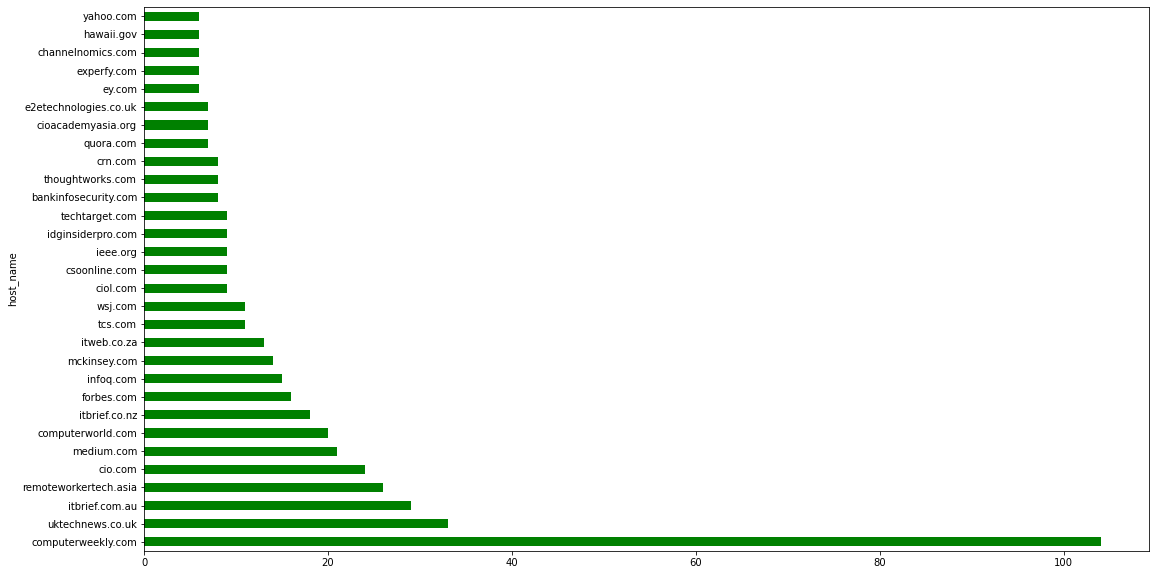

In [ ]:
# Gráfico top30 fontes

grupo1.head(30).plot(kind = "barh", figsize = (18,10), color = "green", rot = 0)

In [ ]:
# select rows containing 'thoughtworks.com'
df.loc[df['host_name'] == 'computerweekly.com'].head(3)

index type_study       date  year  month  \
29     29       grey 2020-03-10  2020      3   
33     33       grey 2020-03-11  2020      3   
54     54       grey 2020-03-16  2020      3   

                                               header  \
29  Security Think Tank: ID-driven security helps ...   
33  Security Think Tank: Coronavirus crisis helps ...   
54  Covid-19: Three technology areas that CIOs mus...   

                                                 link  on_20200511  \
29  https://www.computerweekly.com/opinion/Securit...          1.0   
33  https://www.computerweekly.com/opinion/Securit...          1.0   
54  https://www.computerweekly.com/news/252480132/...          1.0   

                                              summary protocol  \
29  Mar 11, 2020 — Coronavirus: How to implement s...    https   
33  Mar 12, 2020 — Risk mitigation can be anything...    https   
54  Mar 17, 2020 — ... to ensure that everyone who...    https   

                    domain                                               path  \
29  www.computerweekly.com  /opinion/Security-Think-Tank-ID-driven-securit...   
33  www.computerweekly.com  /opinion/Security-Think-Tank-Coronavirus-crisi...   
54  www.computerweekly.com  /news/252480132/Covid-19-Three-technology-area...   

   query  fragment           host_name     ip_address         Type  \
29   NaN       NaN  computerweekly.com  206.19.49.153  geolocation   
33   NaN       NaN  computerweekly.com  206.19.49.153  geolocation   
54   NaN       NaN  computerweekly.com  206.19.49.153  geolocation   

   AdditionalData CountryCode    CountryName      State     City  Longitude  \
29             {}          US  United States  Louisiana  Reddell -92.426422   
33             {}          US  United States  Louisiana  Reddell -92.426422   
54             {}          US  United States  Louisiana  Reddell -92.426422   

     Latitude      IpAddress  \
29  30.675011  206.19.49.153   
33  30.675011  206.19.49.153   
54  30.675011  206.19.49.153   

                                  header_context_true  \
29  Security Think Tank: ID-driven security helps ...   
33  Security Think Tank: Coronavirus crisis helps ...   
54  Covid-19: Three technology areas that CIOs mus...   

                                 summary_context_true  Asn edges  quarter  \
29  Mar 11, 2020 — Coronavirus: How to implement s...  NaN   NaN        1   
33  Mar 12, 2020 — Risk mitigation can be anything...  NaN   NaN        1   
54  Mar 17, 2020 — ... to ensure that everyone who...  NaN   NaN        1   

    day  day_of_week   shock_wave  page_rank  \
29   10            1  COVID-shock          2   
33   11            2  COVID-shock          3   
54   16            0  COVID-shock          4   

                                    text_context_true  \
29  Security Think Tank: ID-driven security helps ...   
33  Security Think Tank: Coronavirus crisis helps ...   
54  Covid-19: Three technology areas that CIOs mus...   

                           text_context_true_wo_punct  \
29  Security Think Tank IDdriven security helps sa...   
33  Security Think Tank Coronavirus crisis helps p...   
54  Covid19 Three technology areas that CIOs must ...   

               text_context_true_wo_punct_clean_token  \
29  ['security', 'think', 'tank', 'iddriven', 'sec...   
33  ['security', 'think', 'tank', 'coronavirus', '...   
54  ['three', 'technology', 'areas', 'cios', 'must...   

                text_context_true_wo_punct_clean_stem  \
29  secur think tank iddriven secur help safeguard...   
33  secur think tank coronavirus crisi help put se...   
54  covid19 three technolog area cio must address ...   

               text_context_true_wo_punct_clean_lemma  word_count  char_count  \
29  security think tank iddriven security help saf...          32         260   
33  security think tank coronavirus crisis help pu...          31         270   
54  covid19 three technology area cio must address...          27         213   

    avg_word

## Tarefa 2: Qual é a distribuição de frequência por período total?

### Recorde de registros

In [ ]:
print('Recorde em 24h: ', df.page_rank.max())
print('Índice e data: ', df[df['page_rank'] == df.page_rank.max()]['date'])

Recorde em 24h:  16
Índice e data:  142   2020-03-24
165   2020-03-26
Name: date, dtype: datetime64[ns]


### Número de novos registros nos últimos 7 dias

In [ ]:
# Menos o dia corrente que só será divulgado próximo às 20h
(df['page_rank'].tail(8).sum()) - df['page_rank'].iloc[-1]

9

### Taxa de novos casos nos últimos 7 dias

In [ ]:
summary_page_rank = df.groupby(['date']).agg(
    counts = pd.NamedAgg(column='page_rank', aggfunc='max'),
        
).reset_index()

In [ ]:
summary_page_rank.columns = ['date','page_rank']
summary_page_rank.tail(7)

date  page_rank
239 2020-12-17          2
240 2020-12-20          2
241 2020-12-21          1
242 2020-12-22          1
243 2020-12-27          1
244 2020-12-28          1
245 2020-12-31          1

In [ ]:
print('Total de registros:', summary_page_rank['page_rank'].sum())
print('Total de registros nos últimos 7 dias:', summary_page_rank['page_rank'].tail(7).sum())
print('Taxa de registros nos últimos 7 dias:', summary_page_rank['page_rank'].tail(7).sum() / summary_page_rank['page_rank'].sum())

Total de registros: 1120
Total de registros nos últimos 7 dias: 9
Taxa de registros nos últimos 7 dias: 0.008035714285714285


In [ ]:
summary_page_rank['page_rank_ma2d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(2, 1).mean())
summary_page_rank['page_rank_ma3d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(3, 1).mean())
summary_page_rank['page_rank_ma4d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(4, 1).mean())
summary_page_rank['page_rank_ma5d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(5, 1).mean())
summary_page_rank['page_rank_ma7d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(7, 1).mean())
summary_page_rank['page_rank_ma14d'] = summary_page_rank['page_rank'].transform(lambda x: x.rolling(14, 1).mean())

In [ ]:
summary_page_rank.head(14)

date  page_rank  page_rank_ma2d  page_rank_ma3d  page_rank_ma4d  \
0  2019-11-26          1             1.0        1.000000        1.000000   
1  2019-12-14          2             1.5        1.500000        1.500000   
2  2020-01-14          1             1.5        1.333333        1.333333   
3  2020-02-03          1             1.0        1.333333        1.250000   
4  2020-02-09          2             1.5        1.333333        1.500000   
5  2020-02-11          1             1.5        1.333333        1.250000   
6  2020-02-19          1             1.0        1.333333        1.250000   
7  2020-02-27          2             1.5        1.333333        1.500000   
8  2020-02-29          1             1.5        1.333333        1.250000   
9  2020-03-01          3             2.0        2.000000        1.750000   
10 2020-03-02          1             2.0        1.666667        1.750000   
11 2020-03-04          1             1.0        1.666667        1.500000   
12 2020-03-05          4             2.5        2.000000        2.250000   
13 2020-03-07          1             2.5        2.000000        1.750000   

    page_rank_ma5d  page_rank_ma7d  page_rank_ma14d  
0         1.000000        1.000000         1.000000  
1         1.500000        1.500000         1.500000  
2         1.333333        1.333333         1.333333  
3         1.250000        1.250000         1.250000  
4         1.400000        1.400000         1.400000  
5         1.400000        1.333333         1.333333  
6         1.200000        1.285714         1.285714  
7         1.400000        1.428571         1.375000  
8         1.400000        1.285714         1.333333  
9         1.600000        1.571429         1.500000  
10        1.600000        1.571429         1.454545  
11        1.600000        1.428571         1.416667  
12        2.000000        1.857143         1.615385  
13        2.000000        1.857143         1.571429

In [ ]:
summary_page_rank["date"] = pd.to_datetime(summary_page_rank["date"], dayfirst=False)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

df2 = summary_page_rank[['date', 'page_rank']]

x1 = df2.date
y1 = df2.page_rank

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=x1,
                         y=y1,
                         mode='lines',
                         name='page rank'))

# Edit the layout
fig2.update_layout(title='Covid impact: Grey & White literature',
                   xaxis_title='Mês',
                   yaxis_title='Registros')

fig2.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

df2 = summary_page_rank[['date',
               'page_rank_ma2d',
               'page_rank_ma3d',
               'page_rank_ma4d',
               'page_rank_ma5d',
               'page_rank_ma7d',
               'page_rank_ma14d']]
x1 = df2.date
y1 = df2.page_rank_ma2d
y2 = df2.page_rank_ma3d
y3 = df2.page_rank_ma4d
y4 = df2.page_rank_ma5d
y5 = df2.page_rank_ma7d
y6 = df2.page_rank_ma14d

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=x1,
                         y=y1,
                         mode='lines',
                         name='2dias'))

fig2.add_trace(go.Scatter(x=x1,
                         y=y2,
                         mode='lines',
                         name='3dias'))

fig2.add_trace(go.Scatter(x=x1,
                         y=y3,
                         mode='lines',
                         name='4dias'))

fig2.add_trace(go.Scatter(x=x1,
                         y=y4,
                         mode='lines',
                         name='5dias'))

fig2.add_trace(go.Scatter(x=x1,
                         y=y5,
                         mode='lines',
                         name='7dias'))

fig2.add_trace(go.Scatter(x=x1,
                         y=y6,
                         mode='lines',
                         name='14dias'))

# Edit the layout
fig2.update_layout(title='Covid impact: Grey literature - média móvel',
                   xaxis_title='Mês',
                   yaxis_title='Registros')

fig2.show()

In [ ]:
sumary_host_name = df.groupby(['date','host_name']).agg(
    counts = pd.NamedAgg(column='host_name', aggfunc='count'),
        
).reset_index()

In [ ]:
sumary_host_name.sort_values(by=['counts'], ascending = False).head(20)

date              host_name  counts
862  2020-08-05     computerweekly.com       2
920  2020-09-01             forbes.com       2
581  2020-05-31           mckinsey.com       2
439  2020-05-07  remoteworkertech.asia       2
447  2020-05-10     computerweekly.com       2
993  2020-09-24     computerweekly.com       2
451  2020-05-10  remoteworkertech.asia       2
731  2020-06-25         itbrief.com.au       2
47   2020-03-15         intersys.co.uk       2
654  2020-06-14                tcs.com       2
940  2020-09-06       uktechnews.co.uk       2
52   2020-03-16     computerweekly.com       2
1050 2020-11-02               ieee.org       2
767  2020-07-05         itbrief.com.au       2
1027 2020-10-07               ieee.org       2
894  2020-08-25     covidconnectni.com       2
899  2020-08-26             forbes.com       2
78   2020-03-18     computerweekly.com       2
579  2020-05-31     computerweekly.com       2
79   2020-03-18      computerworld.com       2


## Tarefa 3: Qual é a distribuição de frequência por trimestre?

In [ ]:
date_sumary = df.groupby(['date']).agg(
    counts = pd.NamedAgg(column='date', aggfunc='count'),
        
).reset_index()

In [ ]:
date_sumary

date  counts
0   2019-11-26       1
1   2019-12-14       2
2   2020-01-14       1
3   2020-02-03       1
4   2020-02-09       2
5   2020-02-11       1
6   2020-02-19       1
7   2020-02-27       2
8   2020-02-29       1
9   2020-03-01       3
10  2020-03-02       1
11  2020-03-04       1
12  2020-03-05       4
13  2020-03-07       1
14  2020-03-08       3
15  2020-03-09       3
16  2020-03-10       3
17  2020-03-11       3
18  2020-03-12       5
19  2020-03-14       4
20  2020-03-15       8
21  2020-03-16      13
22  2020-03-17      14
23  2020-03-18      12
24  2020-03-19      13
25  2020-03-20       2
26  2020-03-21       1
27  2020-03-22      10
28  2020-03-23      11
29  2020-03-24      16
30  2020-03-25       7
31  2020-03-26      16
32  2020-03-27       4
33  2020-03-28       2
34  2020-03-29      11
35  2020-03-30       9
36  2020-03-31       5
37  2020-04-01      10
38  2020-04-02       5
39  2020-04-03       2
40  2020-04-04       2
41  2020-04-05      14
42  2020-04-06       9
43  2020-04-07       9
44  2020-04-08       4
45  2020-04-09       7
46  2020-04-12       8
47  2020-04-13       5
48  2020-04-14       8
49  2020-04-15       8
50  2020-04-16       8
51  2020-04-17       1
52  2020-04-18       3
53  2020-04-19      11
54  2020-04-20       8
55  2020-04-21       7
56  2020-04-22       4
57  2020-04-23      10
58  2020-04-24       2
59  2020-04-26      11
60  2020-04-27      12
61  2020-04-28       8
62  2020-04-29      12
63  2020-04-30      11
64  2020-05-01       2
65  2020-05-02       3
66  2020-05-03      11
67  2020-05-04       9
68  2020-05-05       8
69  2020-05-06       9
70  2020-05-07       9
71  2020-05-08       3
72  2020-05-09       2
73  2020-05-10       9
74  2020-05-11       7
75  2020-05-12       8
76  2020-05-13       9
77  2020-05-14      10
78  2020-05-15       3
79  2020-05-16       3
80  2020-05-17       8
81  2020-05-18       9
82  2020-05-19       7
83  2020-05-20       9
84  2020-05-21       4
85  2020-05-22       1
86  2020-05-24       4
87  2020-05-25      15
88  2020-05-26       9
89  2020-05-27       8
90  2020-05-28       7
91  2020-05-29       3
92  2020-05-31       7
93  2020-06-01       3
94  2020-06-02       5
95  2020-06-03       3
96  2020-06-04       9
97  2020-06-05       1
98  2020-06-06       2
99  2020-06-07       6
100 2020-06-08       6
101 2020-06-09      13
102 2020-06-10      10
103 2020-06-11       6
104 2020-06-12       2
105 2020-06-14       8
106 2020-06-15      13
107 2020-06-16       6
108 2020-06-17       8
109 2020-06-18       8
110 2020-06-19       5
111 2020-06-20       3
112 2020-06-21       6
113 2020-06-22      12
114 2020-06-23       8
115 2020-06-24       3
116 2020-06-25      11
117 2020-06-26       3
118 2020-06-28       4
119 2020-06-29      10
120 2020-06-30       6
121 2020-07-01       5
122 2020-07-02       2
123 2020-07-05       3
124 2020-07-06       4
125 2020-07-07       4
126 2020-07-08       5
127 2020-07-09       5
128 2020-07-11       1
129 2020-07-12       7
130 2020-07-14       6
131 2020-07-15       3
132 2020-07-16       4
133 2020-07-17       2
134 2020-07-18       1
135 2020-07-19       4
136 2020-07-20       4
137 2020-07-21       7
138 2020-07-22       6
139 2020-07-23       4
140 2020-07-24       1
141 2020-07-26       5
142 2020-07-27       1
143 2020-07-28       6
144 2020-07-29       2
145 2020-07-30       3
146 2020-07-31       2
147 2020-08-02       3
148 2020-08-03       1
149 2020-08-04       3
150 2020-08-05       3
151 2020-08-06       1
152 2020-08-09       2
153 2020-08-10       3
154 2020-08-11       6
155 2020-08-12       5
156 2020-08-13       1
157 2020-08-16       2
158 2020-08-17       3
159 2020-08-18       1
160 2020-08-19       1
161 2020-08-20       2
162 2020-08-22       1
163 2020-08-23       2
164 2020-08-25       5
165 2020-08-26      11
166 2020-08-27       3
167 2020-08-28       2
168 2020-08-30       3
169 2020-08-31       2
170 2020-09-01       8
171 2020-09-02      12
172 2020-09-03       1
173 2020

In [ ]:
quarter_sumary = date_sumary.set_index('date')
quarter_sumary.index = quarter_sumary.index.to_period("Q")

In [ ]:
quarter_sumary.head()

counts
date          
2019Q4       1
2019Q4       2
2020Q1       1
2020Q1       1
2020Q1       2

<AxesSubplot:xlabel='date'>

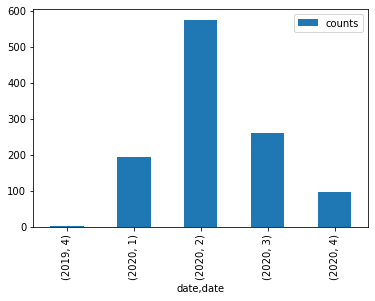

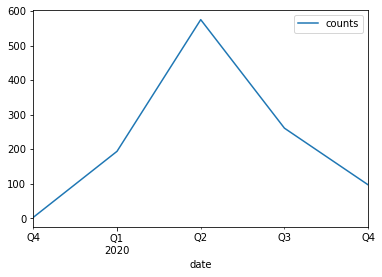

In [ ]:
quarter_sumary.groupby(by=[quarter_sumary.index.year, quarter_sumary.index.quarter]).sum().plot(kind='bar')
quarter_sumary.groupby(by=[quarter_sumary.index.year, quarter_sumary.index.quarter]).transform('sum').plot()

# PNL

It runs the following seven functions by default when using clean()

1. fillna(s) Replace not assigned values with empty spaces.
2. lowercase(s) Lowercase all text.
3. remove_digits() Remove all blocks of digits.
4. remove_punctuation() Remove all string.punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~).
5. remove_diacritics() Remove all accents from strings.
6. remove_stopwords() Remove all stop words.
7. remove_whitespace() Remove all white space between words.

In [ ]:
# Merge columns (header and summary)
df["header"] = df["header"].apply(str)
df['summary'] = df['summary'].apply(str)
df['link'] = df['link'].apply(str)

### Clear 'link' column

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace]
                   #, preprocessing.stem]
#pass the custom_pipeline to the pipeline argument
df['link2'] = hero.clean(df['link'], pipeline = custom_pipeline)
df['link2'].head()

0    https www careratings com pdf annual report an...
1      https www zsah net technology fight coronavirus
2    https www infosys com sustainability documents...
3         https www thoughtworks com china covid video
4    https www atu org coronavirusresources landsca...
Name: link2, dtype: object

In [ ]:
# Merge header and summary columns

#df["text"] =  df["header"] + " " + df["summary"]
df["text_context_true"] =  df["header_context_true"] + " " + df["summary_context_true"]  + " " +  df["link2"]
df['text_context_true'] = df['text_context_true'].apply(lambda x: str(x))

In [ ]:
# Removing Punctuation

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
df["text_context_true_wo_punct"] = df["text_context_true"].apply(lambda text: remove_punctuation(text))
df[['text_context_true','text_context_true_wo_punct']].head()

text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   
2  Sustainability Report - Infosys operational re...   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                          text_context_true_wo_punct  
0  annual report  CAREs Ratings Nov 27 2019 — Rat...  
1  4 Ways Technology Is Helping to Fight the Coro...  
2  Sustainability Report  Infosys operational res...  
3  Facing COVID19 ThoughtWorks Chinas Story  Thou...  
4  2020 Responses to Coronavirus COVID19  Amalgam...

In [ ]:
# Checking the first 10 most frequent words
from collections import Counter
cnt = Counter()
for text in df["text_context_true_wo_punct"].values:
    try:
    # if player_stats['guardians'] is currently a string, let's split on the phrase " and 
        for word in text.split():
            cnt[word] += 1
    except:
    # otherwise, it is already split so we can just ignore the error.
        pass
          
cnt.most_common(10)

[('to', 1447),
 ('the', 1398),
 ('and', 1313),
 ('https', 1102),
 ('2020', 1024),
 ('—', 979),
 ('of', 907),
 ('com', 840),
 ('remote', 745),
 ('working', 716)]

In [ ]:
# Obtém as stopwords em todos os idiomas
dicionario_stopwords = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}
#dicionario_stopwords

In [ ]:
# Função para detectar o idioma predominante com base nas stopwords
def descobre_idioma(text):
    
    # Aplica tokenização considerando pontuação
    palavras = set(nltk.wordpunct_tokenize(text.lower()))
    
    # Conta o total de palavras tokenizadas considerando o dicionário de stopwords
    lang = max(((lang, len(palavras & stopwords)) for lang, stopwords in dicionario_stopwords.items()), key = lambda x: x[1])[0]
    
    # Verifica se o idioma é ingles
    if lang == 'engish':
        return True
    else:
        return False

In [ ]:
# Removal of Stop Words

import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

df["text_context_true_wo_punct_clean"] = df["text_context_true_wo_punct"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df[['text_context_true_wo_punct', 'text_context_true_wo_punct_clean']].head()

[nltk_data] Downloading package stopwords to /home/eluis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   
2  Sustainability Report  Infosys operational res...   
3  Facing COVID19 ThoughtWorks Chinas Story  Thou...   
4  2020 Responses to Coronavirus COVID19  Amalgam...   

                    text_context_true_wo_punct_clean  
0  annual report CAREs Ratings Nov 27 2019 — Rati...  
1  4 Ways Technology Is Helping Fight Coronavirus...  
2  Sustainability Report Infosys operational resi...  
3  Facing COVID19 ThoughtWorks Chinas Story Thoug...  
4  2020 Responses Coronavirus COVID19 Amalgamated...

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_digits
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   #, preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['text_context_true_wo_punct_clean'] = hero.clean(df['text_context_true_wo_punct_clean'], pipeline = custom_pipeline)

In [ ]:
df[['text_context_true_wo_punct_clean']].head()

text_context_true_wo_punct_clean
0  annual report cares ratings nov       ratings ...
1    ways technology is helping fight coronavirus...
2  sustainability report infosys operational resi...
3  facing covid19 thoughtworks chinas story thoug...
4    responses coronavirus covid19 amalgamated fe...

In [ ]:
import texthero as hero
from texthero import stopwords
import pandas as pd
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(['*','http', 'https', "https://", 'www', 'com', 'text', '_', '-', 'io', 'pdf', 'file', 'id',
                                                'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'set', 'oct', 'nov', 'dez',
                                                'vs', 'page', 'html', 'type', 'digit', 'de', 'co', 'wp', 'item', 'org']))
#s = pd.Series('Texthero is not only for the heroes www')

df['text_context_true_wo_punct_clean'] = hero.remove_stopwords(df['text_context_true_wo_punct_clean'], custom_stopwords)
df[['text_context_true_wo_punct_clean']].head()

text_context_true_wo_punct_clean
0  annual report cares ratings        ratings sur...
1    ways technology  helping fight coronavirus z...
2  sustainability report infosys operational resi...
3  facing covid19 thoughtworks chinas story thoug...
4    responses coronavirus covid19 amalgamated   ...

In [ ]:
# Função de limpeza dos dados

def limpa_dados(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    #desc = [word for word in desc if word not in stop_words_pt]
    #desc = [word for word in desc if word not in stop_words_en]
    return desc

In [ ]:
# Aplicamos a função de limpeza a coluna de descrição da vaga
df["text_context_true_wo_punct_clean_token"] = df["text_context_true_wo_punct_clean"].apply(limpa_dados)
df[['text_context_true_wo_punct_clean','text_context_true_wo_punct_clean_token']]

text_context_true_wo_punct_clean  \
0     annual report cares ratings        ratings sur...   
1       ways technology  helping fight coronavirus z...   
2     sustainability report infosys operational resi...   
3     facing covid19 thoughtworks chinas story thoug...   
4       responses coronavirus covid19 amalgamated   ...   
...                                                 ...   
1125                                                nan   
1126                                                nan   
1127                                                nan   
1128                                                nan   
1129                                                nan   

                 text_context_true_wo_punct_clean_token  
0     [annual, report, cares, ratings, ratings, surv...  
1     [ways, technology, helping, fight, coronavirus...  
2     [sustainability, report, infosys, operational,...  
3     [facing, thoughtworks, chinas, story, thoughtw...  
4     [responses, coronavirus, amalgamated, governor...  
...                                                 ...  
1125                                              [nan]  
1126                                              [nan]  
1127                                              [nan]  
1128                                              [nan]  
1129                                              [nan]  

[1130 rows x 2 columns]

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_digits
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   , preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['text_context_true_wo_punct_clean_stem'] = hero.clean(df['text_context_true_wo_punct_clean'], pipeline = custom_pipeline)

In [ ]:
# Lemmatization

# https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d
# https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Pos tag, used Noun, Verb, Adjective and Adverb
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

# Function for lemmatization using POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

# Passing the function to 'text_rare' and store in 'text_lemma'
df["text_context_true_wo_punct_clean_lemma"] = df["text_context_true_wo_punct_clean"].apply(lemmatize_words)
df[['text_context_true_wo_punct_clean','text_context_true_wo_punct_clean_lemma']].head()

text_context_true_wo_punct_clean  \
0  annual report cares ratings        ratings sur...   
1    ways technology  helping fight coronavirus z...   
2  sustainability report infosys operational resi...   
3  facing covid19 thoughtworks chinas story thoug...   
4    responses coronavirus covid19 amalgamated   ...   

              text_context_true_wo_punct_clean_lemma  
0  annual report care rating rating survey covid ...  
1  way technology help fight coronavirus zsah con...  
2  sustainability report infosys operational resi...  
3  face covid19 thoughtworks chinas story thought...  
4  response coronavirus covid19 amalgamate govern...

# DATAVIZ DAS RQ'S

## RQ2.1 - FASE CITADA

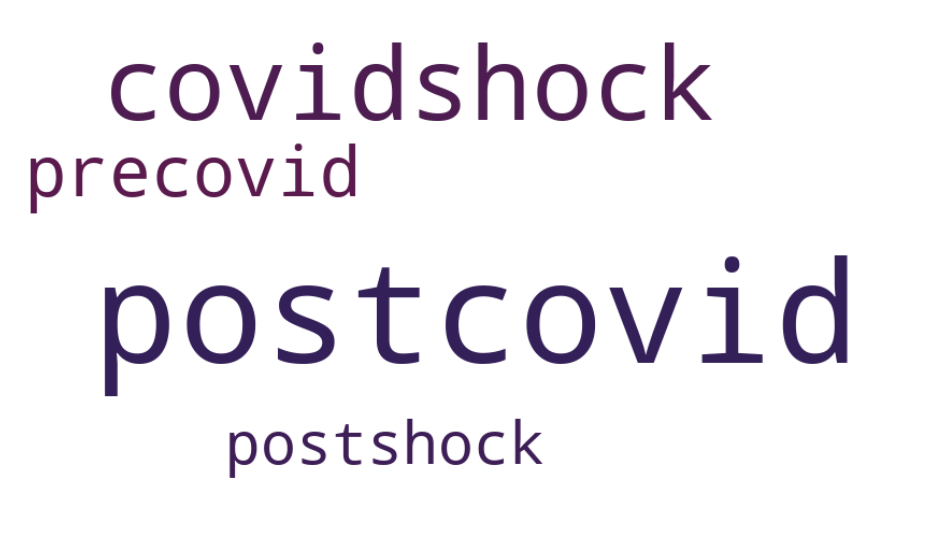

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['rq2.1_fase_citada'], width=853, height=506, max_words=5, colormap=cmap, background_color='WHITE')

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   #, preprocessing.remove_whitespace
                   #, preprocessing.remove_digits
                   #, preprocessing.remove_diacritics
                   #, preprocessing.remove_punctuation
                   #, preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   #, preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['rq2.1_fase_citada_clean'] = hero.clean(df['rq2.1_fase_citada'], pipeline = custom_pipeline)

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['rq2.1_fase_citada_clean'])
df2 = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2

keywords  count
0   postcovid    131
1  covidshock     60
2    precovid     22
3   postshock     15

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
grey = df.loc[df['type_study']=='grey']
white = df.loc[df['type_study']=='white']
multivocal = df

In [ ]:
white.shape

(14, 103)

In [ ]:
common_words_grey = get_top_n_words(grey['rq3'], 10)
common_words_white = get_top_n_words(white['rq3'], 10)
common_words_multivocal = get_top_n_words(multivocal['rq3'], 10)

In [ ]:
common_words_grey

[('trabalho', 664),
 ('remoto', 650),
 ('cibersegurança', 319),
 ('digital', 263),
 ('transformação', 240),
 ('cloud', 205),
 ('financeiro', 158),
 ('produtividade', 154),
 ('continuidade', 139),
 ('negócios', 135)]

In [ ]:
common_words_grey_df = pd.DataFrame(common_words_grey, columns = ['keywords' , 'count'])
common_words_grey_df['type_study'] = 'grey'
common_words_white_df = pd.DataFrame(common_words_white, columns = ['keywords' , 'count'])
common_words_white_df['type_study'] = 'white'
common_words_multivocal_df = pd.DataFrame(common_words_multivocal, columns = ['keywords' , 'count'])
common_words_multivocal_df['type_study'] = 'multivocal'

In [ ]:
common_words_white_df

keywords  count type_study
0           remoto      8      white
1  desenvolvimento      8      white
2     inteligência      6      white
3       artificial      5      white
4         trabalho      5      white
5              iot      4      white
6   cibersegurança      4      white
7         robótica      4      white
8           mobile      4      white
9       blockchain      3      white

In [ ]:
common_words_grey_df

keywords  count type_study
0        trabalho    664       grey
1          remoto    650       grey
2  cibersegurança    319       grey
3         digital    263       grey
4   transformação    240       grey
5           cloud    205       grey
6      financeiro    158       grey
7   produtividade    154       grey
8    continuidade    139       grey
9        negócios    135       grey

In [ ]:
common_words_multivocal_df

keywords  count  type_study
0        trabalho    669  multivocal
1          remoto    658  multivocal
2  cibersegurança    323  multivocal
3         digital    265  multivocal
4   transformação    242  multivocal
5           cloud    205  multivocal
6      financeiro    161  multivocal
7   produtividade    157  multivocal
8    continuidade    140  multivocal
9        negócios    136  multivocal

In [ ]:
df2 = pd.concat([common_words_grey_df,common_words_white_df,common_words_multivocal_df])
df2

keywords  count  type_study
0         trabalho    664        grey
1           remoto    650        grey
2   cibersegurança    319        grey
3          digital    263        grey
4    transformação    240        grey
5            cloud    205        grey
6       financeiro    158        grey
7    produtividade    154        grey
8     continuidade    139        grey
9         negócios    135        grey
0           remoto      8       white
1  desenvolvimento      8       white
2     inteligência      6       white
3       artificial      5       white
4         trabalho      5       white
5              iot      4       white
6   cibersegurança      4       white
7         robótica      4       white
8           mobile      4       white
9       blockchain      3       white
0         trabalho    669  multivocal
1           remoto    658  multivocal
2   cibersegurança    323  multivocal
3          digital    265  multivocal
4    transformação    242  multivocal
5            cloud    205  multivocal
6       financeiro    161  multivocal
7    produtividade    157  multivocal
8     continuidade    140  multivocal
9         negócios    136  multivocal

In [ ]:
pivot = pd.pivot_table(df2, index=['type_study', 'keywords']).style
pivot

In [ ]:
fig = go.Figure([go.Bar(x=df2['keywords'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 10 keywords in the question text after removing stop words and lemmatization"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

In [ ]:
# get  bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_bigram(grey['rq3_clean'], 20)
df3_white = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3_white

bigram  count
0           trabalho remoto    641
1     transformação digital    240
2     continuidade negócios    134
3        plano continuidade    132
4      negócios recuperação    132
5     recuperação desastres    132
6            desastres bcdr    132
7             boas praticas    123
8                daily news     96
9               remoto boas     75
10    remoto cibersegurança     52
11     remoto produtividade     47
12  inteligência artificial     43
13  cibersegurança trabalho     39
14             remoto cloud     38
15           news editorial     36
16     remoto transformação     35
17              método ágil     34
18       remoto comunicação     32
19             saude mental     31

In [ ]:
common_words = get_top_n_bigram(grey['rq3_clean'], 20)
df3_grey = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3_grey

bigram  count
0           trabalho remoto    641
1     transformação digital    240
2     continuidade negócios    134
3        plano continuidade    132
4      negócios recuperação    132
5     recuperação desastres    132
6            desastres bcdr    132
7             boas praticas    123
8                daily news     96
9               remoto boas     75
10    remoto cibersegurança     52
11     remoto produtividade     47
12  inteligência artificial     43
13  cibersegurança trabalho     39
14             remoto cloud     38
15           news editorial     36
16     remoto transformação     35
17              método ágil     34
18       remoto comunicação     32
19             saude mental     31

In [ ]:
common_words = get_top_n_bigram(white['rq3_clean'], 20)
df3_white = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3_white

bigram  count
0       inteligencia artificial      5
1               trabalho remoto      5
2        desenvolvimento mobile      4
3                 ensino remoto      3
4                  internet das      2
5                    das coisas      2
6                    coisas iot      2
7         transformacao digital      2
8          remoto produtividade      2
9             saude ocupacional      2
10             gestao desastres      2
11  desenvolvimento distribuido      2
12                     big data      2
13          desenvolvimento web      2
14        reconhecimento facial      2
15            regulamento geral      2
16               geral protecao      2
17               protecao dados      2
18                 iot veiculos      1
19              veiculos aereos      1

In [ ]:
common_words = get_top_n_bigram(multivocal['rq3_clean'], 20)
df3_multivocal = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3_multivocal

bigram  count
0           trabalho remoto    646
1     transformação digital    240
2     continuidade negócios    134
3        plano continuidade    132
4      negócios recuperação    132
5     recuperação desastres    132
6            desastres bcdr    132
7             boas praticas    124
8                daily news     96
9               remoto boas     75
10    remoto cibersegurança     52
11     remoto produtividade     49
12  inteligência artificial     43
13  cibersegurança trabalho     39
14             remoto cloud     38
15           news editorial     36
16     remoto transformação     35
17              método ágil     34
18       remoto comunicação     32
19             saude mental     31

In [ ]:
#get trigrams
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
common_words = get_top_n_trigram(grey['rq3_clean'], 20)
df4_grey = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4_grey

trigram  count
0         plano continuidade negócios    132
1   continuidade negócios recuperação    132
2      negócios recuperação desastres    132
3          recuperação desastres bcdr    132
4                trabalho remoto boas     74
5                remoto boas praticas     74
6      trabalho remoto cibersegurança     51
7       trabalho remoto produtividade     47
8      cibersegurança trabalho remoto     39
9               trabalho remoto cloud     37
10               daily news editorial     36
11       remoto transformação digital     35
12      trabalho remoto transformação     34
13        trabalho remoto comunicação     32
14     transformação digital trabalho     27
15            digital trabalho remoto     27
16              trabalho remoto plano     27
17          remoto plano continuidade     27
18         trabalho remoto financeiro     25
19        trabalho remoto colaboração     23

In [ ]:
common_words = get_top_n_trigram(white['rq3_clean'], 20)
df4_white = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4_white

trigram  count
0                  internet das coisas      2
1                       das coisas iot      2
2        trabalho remoto produtividade      2
3           regulamento geral protecao      2
4                 geral protecao dados      2
5                  coisas iot veiculos      1
6                  iot veiculos aereos      1
7                  veiculos aereos nao      1
8                aereos nao tripulados      1
9                  nao tripulados uavs      1
10          tripulados uavs blockchain      1
11        uavs blockchain inteligencia      1
12  blockchain inteligencia artificial      1
13          inteligencia artificial ia      1
14         artificial ia conectividade      1
15                 ia conectividade 5g      1
16         conectividade 5g financeiro      1
17     produtividade commerce trabalho      1
18            commerce trabalho remoto      1
19       trabalho remoto transformacao      1

In [ ]:
common_words = get_top_n_trigram(multivocal['rq3_clean'], 20)
df4_multivocal = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4_multivocal

trigram  count
0         plano continuidade negócios    132
1   continuidade negócios recuperação    132
2      negócios recuperação desastres    132
3          recuperação desastres bcdr    132
4                trabalho remoto boas     74
5                remoto boas praticas     74
6      trabalho remoto cibersegurança     51
7       trabalho remoto produtividade     49
8      cibersegurança trabalho remoto     39
9               trabalho remoto cloud     37
10               daily news editorial     36
11       remoto transformação digital     35
12      trabalho remoto transformação     34
13        trabalho remoto comunicação     32
14            digital trabalho remoto     28
15     transformação digital trabalho     27
16              trabalho remoto plano     27
17          remoto plano continuidade     27
18         trabalho remoto financeiro     25
19        trabalho remoto colaboração     23

In [ ]:
fig = go.Figure([go.Bar(x=df4_multivocal['trigram'], y=df4_multivocal['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 trigrams in the question text"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

## CONOTACAO

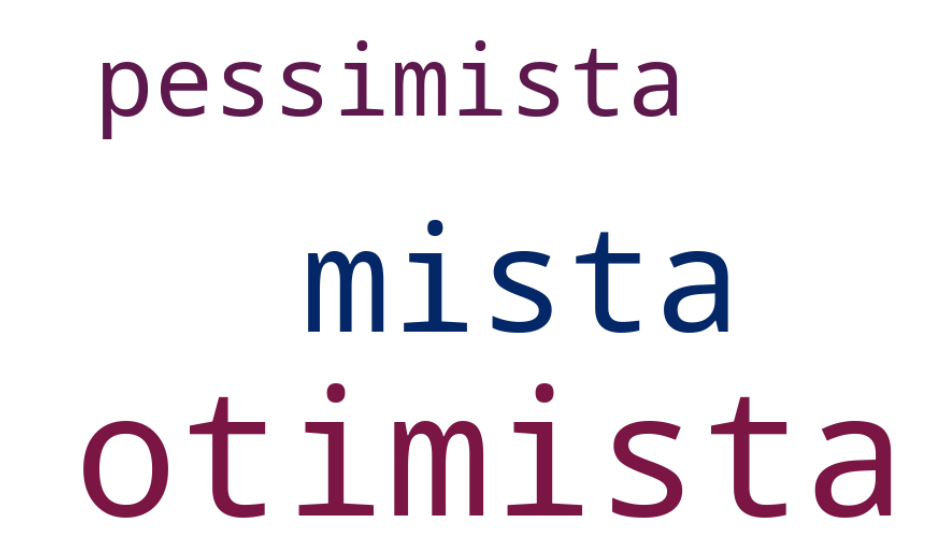

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['conotação'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_n_words(white['conotação'])
df2_white = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_white

keywords  count
0     mista     11
1  otimista      3

In [ ]:
common_words = get_top_n_words(grey['conotação'])
df2_grey = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_grey

keywords  count
0    otimista    580
1       mista    395
2  pessimista    141

In [ ]:
common_words = get_top_n_words(multivocal['conotação'])
df2_multivocal = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_multivocal

keywords  count
0    otimista    583
1       mista    406
2  pessimista    141

## TIPO-PORTE

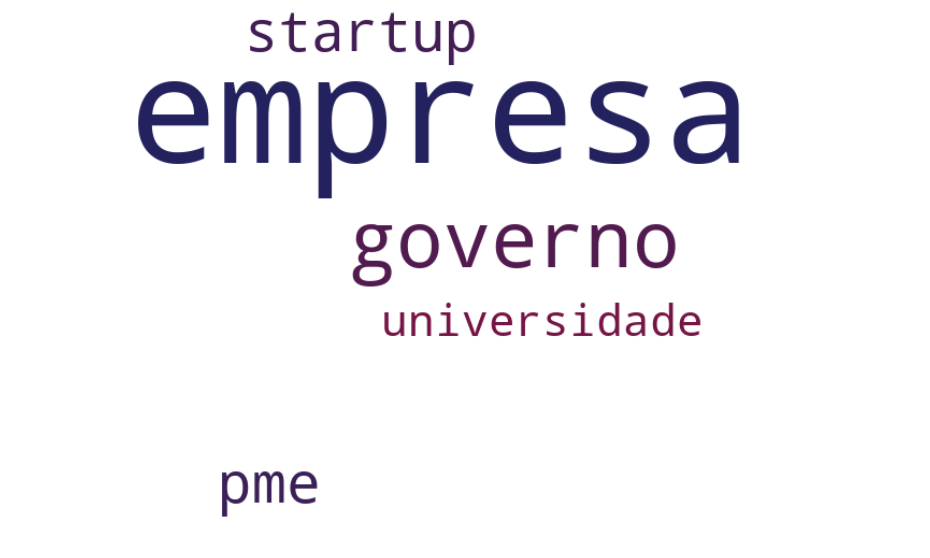

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['tipo_porte'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

In [ ]:
#create a custom cleaning pipeline
#from texthero import preprocessing

custom_pipeline = [preprocessing.fillna
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_digits
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_stopwords
                   , preprocessing.lowercase
                   #, preprocessing.stem
                  ]
#pass the custom_pipeline to the pipeline argument
df['tipo_porte_clean'] = hero.clean(df['tipo_porte'], pipeline = custom_pipeline)

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
white[['tipo_porte_clean']]

tipo_porte_clean
1116          empresa
1117              NaN
1118              NaN
1119     universidade
1120              NaN
1121  startup empresa
1122              NaN
1123              NaN
1124  governo empresa
1125              NaN
1126              NaN
1127          empresa
1128     universidade
1129              NaN

In [ ]:
white['tipo_porte_clean'] = white['tipo_porte_clean'].replace(np.nan, 'NA')

<ipython-input-102-790a549e43e4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
common_words = get_top_n_words(white['tipo_porte_clean'])
df2_white = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_white

keywords  count
0            na      8
1       empresa      4
2  universidade      2
3       startup      1
4       governo      1

In [ ]:
common_words = get_top_n_words(grey['tipo_porte_clean'])
df2_grey = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_grey

keywords  count
0       empresa   1062
1       governo     49
2           pme     23
3       startup     21
4  universidade     11

In [ ]:
multivocal['tipo_porte_clean'] = multivocal['tipo_porte_clean'].replace(np.nan, 'NA')

In [ ]:
common_words = get_top_n_words(multivocal['tipo_porte_clean'])
df2_multivocal = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_multivocal

keywords  count
0       empresa   1066
1       governo     50
2           pme     23
3       startup     22
4  universidade     13

## SETOR

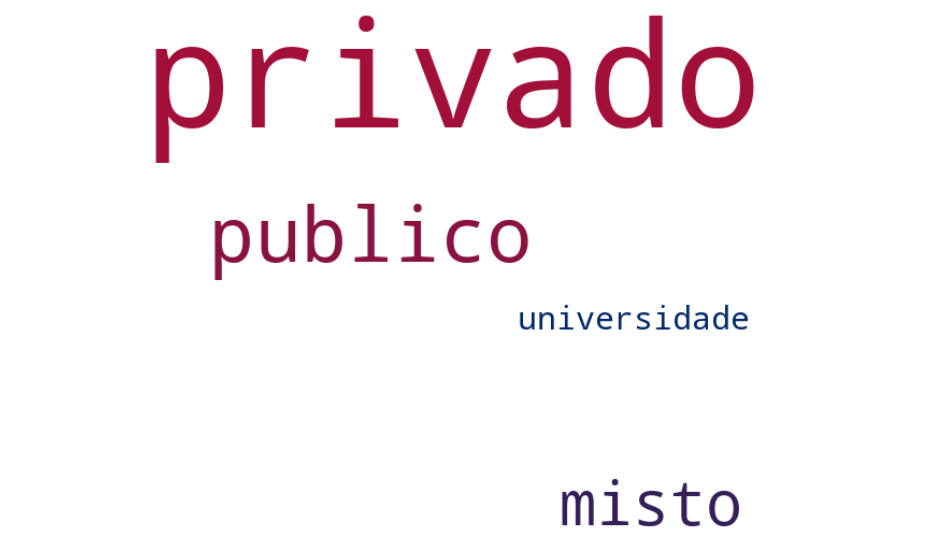

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['setor'], width=853, height=506, max_words=100, colormap=cmap, background_color='WHITE')

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
white['setor'] = white['setor'].replace(np.nan, 'NA')

<ipython-input-109-18ba8d2990b1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
common_words = get_top_n_words(white['setor'])
df2_white = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_white

keywords  count
0         misto      6
1            na      4
2       privado      3
3  universidade      1

In [ ]:
common_words = get_top_n_words(grey['setor'])
df2_grey = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_grey

keywords  count
0  privado   1066
1  publico     35
2    misto     15

In [ ]:
multivocal['setor'] = multivocal['setor'].replace(np.nan, 'NA')

In [ ]:
common_words = get_top_n_words(multivocal['setor'])
df2_multivocal = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2_multivocal

keywords  count
0       privado   1069
1       publico     35
2         misto     21
3            na      4
4  universidade      1

## TEXTO BASICO (TITULO + RESUMO + PALAVRAS-CHAVE + LINK)

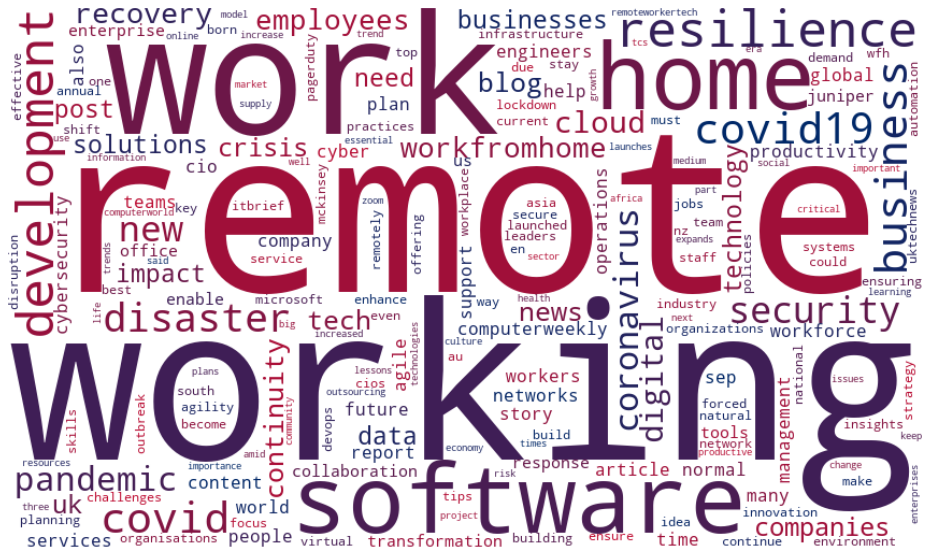

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['text_context_true_wo_punct_clean'], width=853, height=506, max_words=200, colormap=cmap, background_color='WHITE')

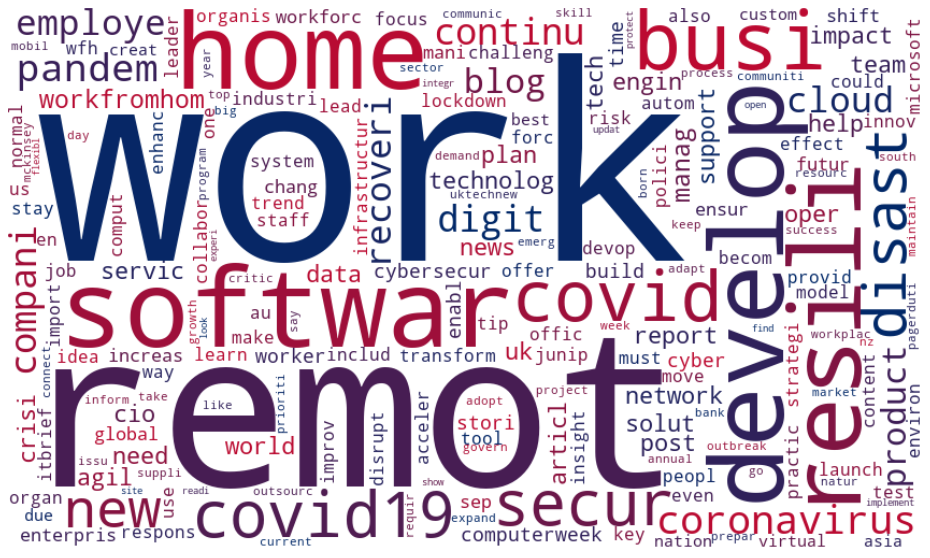

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#002868","#BF0A30"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

hero.visualization.wordcloud(df['text_context_true_wo_punct_clean_stem'], width=853, height=506, max_words=200, colormap=cmap, background_color='WHITE')

#### Top key words

In [ ]:
# Number of Words

df['word_count'] = df["text_context_true_wo_punct_clean_token"].apply(lambda x: len(str(x).split(" ")))
df[['text_context_true_wo_punct_clean_token','word_count']].head()

text_context_true_wo_punct_clean_token  word_count
0  [annual, report, cares, ratings, ratings, surv...          19
1  [ways, technology, helping, fight, coronavirus...          25
2  [sustainability, report, infosys, operational,...          23
3  [facing, thoughtworks, chinas, story, thoughtw...          38
4  [responses, coronavirus, amalgamated, governor...          37

In [ ]:
# Number of characters

df['char_count'] = df["text_context_true_wo_punct_clean"].map(lambda i: len(i))
df[['text_context_true_wo_punct_clean_token','char_count']].head()

text_context_true_wo_punct_clean_token  char_count
0  [annual, report, cares, ratings, ratings, surv...         182
1  [ways, technology, helping, fight, coronavirus...         221
2  [sustainability, report, infosys, operational,...         216
3  [facing, thoughtworks, chinas, story, thoughtw...         321
4  [responses, coronavirus, amalgamated, governor...         359

In [ ]:
# Average Word Length

def avg_word(sentence):
    words = [sentence.split() for sentence in sentence]
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df["text_context_true_wo_punct_clean_token"].apply(lambda x: avg_word(x))
df[['text_context_true_wo_punct_clean_token','avg_word']].head()

text_context_true_wo_punct_clean_token  avg_word
0  [annual, report, cares, ratings, ratings, surv...       1.0
1  [ways, technology, helping, fight, coronavirus...       1.0
2  [sustainability, report, infosys, operational,...       1.0
3  [facing, thoughtworks, chinas, story, thoughtw...       1.0
4  [responses, coronavirus, amalgamated, governor...       1.0

In [ ]:
# Number of stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text_context_true_wo_punct'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text_context_true_wo_punct','stopwords']].head()

text_context_true_wo_punct  stopwords
0  annual report  CAREs Ratings Nov 27 2019 — Rat...          6
1  4 Ways Technology Is Helping to Fight the Coro...          6
2  Sustainability Report  Infosys operational res...         11
3  Facing COVID19 ThoughtWorks Chinas Story  Thou...         19
4  2020 Responses to Coronavirus COVID19  Amalgam...          8

In [ ]:
# Number of special characters

df['hastags'] = df['text_context_true'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['text_context_true','hastags']].head()

text_context_true  hastags
0  annual report - CARE's Ratings Nov 27, 2019 — ...        0
1  4 Ways Technology Is Helping to Fight the Coro...        0
2  Sustainability Report - Infosys operational re...        0
3  Facing COVID-19: ThoughtWorks China's Story | ...        0
4  2020 Responses to Coronavirus (COVID-19) - Ama...        0

In [ ]:
# get unigramns
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['text_context_true_wo_punct_clean'], 10)
df2 = pd.DataFrame(common_words, columns = ['keywords' , 'count'])
df2

keywords  count
0       remote    894
1      working    787
2         work    746
3     software    692
4         home    649
5   resilience    548
6  development    546
7     business    409
8        covid    396
9      covid19    391

In [ ]:
fig = go.Figure([go.Bar(x=df2['keywords'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 10 keywords in the question text after removing stop words and lemmatization"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

### NLP Operations on Text

In [ ]:
dtst = df.head(100)
dtst.head()

index type_study       date  year  month  \
0      0       grey 2019-11-26  2019     11   
1      1       grey 2019-12-14  2019     12   
2      2       grey 2019-12-14  2019     12   
3      3       grey 2020-01-14  2020      1   
4      4       grey 2020-02-03  2020      2   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   
2  https://www.infosys.com/sustainability/documen...          1.0   
3  https://www.thoughtworks.com/china-covid-19-video          1.0   
4  https://www.atu.org/coronavirusresources/Lands...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   
2  operational resilience of the Company. One of ...    https   
3  Embrace a modern approach to software developm...    https   
4  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
0   www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1          www.zsah.net                     /technology-fight-coronavirus/   
2       www.infosys.com  /sustainability/documents/infosys-sustainabili...   
3  www.thoughtworks.com                              /china-covid-19-video   
4           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name     ip_address         Type  \
0   NaN       NaN   careratings.com  202.46.201.53  geolocation   
1   NaN       NaN          zsah.net    91217245111  geolocation   
2   NaN       NaN       infosys.com    23.66.181.5  geolocation   
3   NaN       NaN  thoughtworks.com   99.84.168.63  geolocation   
4   NaN       NaN           atu.org    52.2.22.143  geolocation   

  AdditionalData CountryCode     CountryName        State  \
0             {}          IN           India  Maharashtra   
1             {}          GB  United Kingdom      England   
2             {}          US   United States     Illinois   
3             {}          US   United States     Illinois   
4             {}          US   United States     Virginia   

                  City  Longitude   Latitude      IpAddress  \
0                Powai  72.877701  19.076000  202.46.201.53   
1  City of Westminster  -0.116700  51.500000    91217245111   
2              Chicago -87.671249  41.848850    23.66.181.5   
3              Chicago -87.671249  41.848850   99.84.168.63   
4              Ashburn -77.474197  39.043701    52.2.22.143   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   
2  operational resilience of the Company. One of ...  NaN   NaN        4   14   
3  Embrace a modern approach to software developm...  NaN   NaN        1   14   
4  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3   

   day_of_week   shock_wave  page_rank  \
0            1    Pre-COVID          1   
1            5    Pre-COVID          1   
2        

In [ ]:
#nlp = spacy.load('en_core_web_lg')
nlp = spacy.load('en_core_web_sm')

tokens = nlp(''.join(str(dtst.text_context_true.tolist())))
tokens

["annual report - CARE's Ratings Nov 27, 2019 — Ratings' Survey on Covid Impact – 17-3-2020. 11. 12. 1. 2. 3. 4. 5 ... IT has successfully enabled all employees to work from home. The focus for\xa0... https www careratings com pdf annual report annual 20report 202020 web pdf", '4 Ways Technology Is Helping to Fight the Coronavirus - zsah Connect organisations in need of development help; Voluntary web and software development services offering; Tools for COVID-19 data queries; COVID-19\xa0... https www zsah net technology fight coronavirus', 'Sustainability Report - Infosys operational resilience of the Company. One of the first response actions at Infosys was the creation of a dedicated COVID-19 core response team, chaired by our\xa0... https www infosys com sustainability documents infosys sustainability report pdf', "Facing COVID-19: ThoughtWorks China's Story | ThoughtWorks Embrace a modern approach to software development and deliver value faster ... to remote delivery models, and

In [ ]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(10)

[('Mar 19, 2020', 13),
 ('Mar 17, 2020', 10),
 ('COVID-19', 9),
 ('Mar 18, 2020', 9),
 ('Apple', 6),
 ('2020', 5),
 ('4', 4),
 ('5', 4),
 ('Mar 13, 2020', 4),
 ('Mar 16, 2020', 4)]

In [ ]:
person_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(10)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])
df_person

text  count
0           COVID-19      3
1           Software      3
2          Voluntary      1
3     Quora COVID-19      1
4            and\xa0      1
5         IT Managed      1
6                Mac      1
7  COVID-19 Customer      1
8              Zuora      1
9      Alex Scroxton      1

In [ ]:
norp_list = []
for ent in tokens.ents:
    if ent.label_ == 'NORP':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(10)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])
df_norp

text  count
0  American      1

In [ ]:
gpe_list = []
for ent in tokens.ents:
    if ent.label_ == 'GPE':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(10)
df_gpe = pd.DataFrame(norp_counts, columns =['text', 'count'])
df_gpe 

text  count
0            UK      2
1      American      1
2            US      1
3            DR      1
4  South Africa      1
5    California      1
6        Oregon      1
7     Wellbeing      1
8          U.S.      1
9   South Korea      1

# PNL - TOPIC MODELING

## Analisar a ocorrência de palavras chaves¶

In [ ]:
#https://medium.com/better-programming/how-i-analyzed-mediums-popular-page-with-python-part-2-c1952583061e

# strings or keywords to look for
keywords = [
'covid impact',
'disaster',
'resilience',
'software engineers',
'software development',
'disaster informatics',
'productivity',
'work from home',
'remote working']

In [ ]:
df2 = df[['date','text_context_true_wo_punct_clean']]
df2.head()

date                   text_context_true_wo_punct_clean
0 2019-11-26  annual report cares ratings        ratings sur...
1 2019-12-14    ways technology  helping fight coronavirus z...
2 2019-12-14  sustainability report infosys operational resi...
3 2020-01-14  facing covid19 thoughtworks chinas story thoug...
4 2020-02-03    responses coronavirus covid19 amalgamated   ...

In [ ]:
# search rows for keywords and show True if there is a match
for keyword in keywords:
    df2[keyword] = df2.astype(str).sum(axis=1).str.contains(keyword, case=False)

<ipython-input-131-f631cd02f56c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2['keyword_match'] = df2.astype(str).sum(axis=1).str.contains('True', case=False)
df2[['date', 'text_context_true_wo_punct_clean','keyword_match']].head(3)

<ipython-input-132-05ce4e06cdde>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date                   text_context_true_wo_punct_clean  keyword_match
0 2019-11-26  annual report cares ratings        ratings sur...           True
1 2019-12-14    ways technology  helping fight coronavirus z...           True
2 2019-12-14  sustainability report infosys operational resi...           True

In [ ]:
# add to existing keywords list for the total count column created
keywords.append('keyword_match')
# define count of keywords df and get count of each column
count_of_keywords = df2[keywords]
count_of_keywords = count_of_keywords.apply(pd.Series.value_counts)
count_of_keywords = count_of_keywords.reset_index()
count_of_keywords

index  covid impact  disaster  resilience  software engineers  \
0  False          1107       799         639                1043   
1   True            23       331         491                  87   

   software development  disaster informatics  productivity  work from home  \
0                   635                1130.0          1048          1130.0   
1                   495                   NaN            82             NaN   

   remote working  keyword_match  
0             546            135  
1             584            995

In [ ]:
df2.columns

Index(['date', 'text_context_true_wo_punct_clean', 'covid impact', 'disaster',
       'resilience', 'software engineers', 'software development',
       'disaster informatics', 'productivity', 'work from home',
       'remote working', 'keyword_match'],
      dtype='object')

In [ ]:
df2[['date','covid impact','software engineers','software development','disaster informatics','productivity',
    'work from home','remote working','disaster','resilience', 'keyword_match']].head()

date  covid impact  software engineers  software development  \
0 2019-11-26          True               False                 False   
1 2019-12-14         False               False                  True   
2 2019-12-14         False               False                 False   
3 2020-01-14         False               False                  True   
4 2020-02-03         False                True                 False   

   disaster informatics  productivity  work from home  remote working  \
0                 False         False           False           False   
1                 False         False           False           False   
2                 False         False           False           False   
3                 False         False           False            True   
4                 False         False           False            True   

   disaster  resilience  keyword_match  
0     False       False           True  
1     False       False           True  
2     False        True           True  
3     False        True           True  
4      True       False           True

In [ ]:
df2[(df2['covid impact']==True) &  (df2['software development']==True)].head(3)

date                   text_context_true_wo_punct_clean  \
249 2020-04-08  covid19 impact software development  ukrainian...   
320 2020-04-21  webinar recap  covid19 impact recovery        ...   
341 2020-04-24   impact coronavirus covid19  companies embraci...   

     covid impact  disaster  resilience  software engineers  \
249          True     False       False               False   
320          True     False       False               False   
341          True     False       False               False   

     software development  disaster informatics  productivity  work from home  \
249                  True                 False         False           False   
320                  True                 False         False           False   
341                  True                 False         False           False   

     remote working  keyword_match  
249           False           True  
320           False           True  
341           False           True

In [ ]:
df['normalised_date'] = df['date'].dt.normalize()

In [ ]:
df["key"] =  df['normalised_date'].apply(str) + " ; " + df["header"] + " " + df["summary"]  + " ; " +  df["link"]

In [ ]:
df = df.reset_index()

In [ ]:
df2 = df2.reset_index().reset_index()

In [ ]:
df.head(2)

level_0  index type_study       date  year  month  \
0        0      0       grey 2019-11-26  2019     11   
1        1      1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  [annual, report, cares, ratings, ratings, surv...   
1  [ways, technology, helping, fight, coronavirus...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0                   0                  

In [ ]:
df = pd.merge(df, df2, on='level_0')

In [ ]:
df.head(2)

level_0  index_x type_study     date_x  year  month  \
0        0        0       grey 2019-11-26  2019     11   
1        1        1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  [annual, report, cares, ratings, ratings, surv...   
1  [ways, technology, helping, fight, coronavirus...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                  text_context_true_wo_punct_clean_x  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0                   0            

In [ ]:
for i in df.columns:
    print("'"+i+"'"+",")

'level_0',
'index_x',
'type_study',
'date_x',
'year',
'month',
'header',
'link',
'on_20200511',
'summary',
'protocol',
'domain',
'path',
'query',
'fragment',
'host_name',
'ip_address',
'Type',
'AdditionalData',
'CountryCode',
'CountryName',
'State',
'City',
'Longitude',
'Latitude',
'IpAddress',
'header_context_true',
'summary_context_true',
'Asn',
'edges',
'quarter',
'day',
'day_of_week',
'shock_wave',
'page_rank',
'text_context_true',
'text_context_true_wo_punct',
'text_context_true_wo_punct_clean_token',
'text_context_true_wo_punct_clean_stem',
'text_context_true_wo_punct_clean_lemma',
'word_count',
'char_count',
'avg_word',
'stopwords',
'hastags',
'key',
'Happy',
'Angry',
'Surprise',
'Sad',
'Fear',
'dominant_emotion',
'weekday',
'questao1-persona',
'questao2-persona',
'questao1-disaster_resilience',
'text_context_true_wo_punct_clean_x',
'status1-selecao',
'status2-duplicated',
'status3-title-abst_keys',
'status4-read',
'rq1',
'rq2',
'rq2.1_fase_citada',
'rq3',
'format',
'font_type',

In [ ]:
df.columns = df.columns.str.replace("_x", "")

In [ ]:
# Delete columns
df.drop([
'index_y',
'date_y',
'text_context_true_wo_punct_clean_y',
'covid impact_y',
'disaster_y',
'resilience_y',
'software engineers_y',
'software development_y',
'disaster informatics_y',
'productivity_y',
'work from home_y',
'remote working_y',
'keyword_match_y',

], axis=1, inplace=True)

In [ ]:
dft = df.dropna(subset=['text_context_true_wo_punct_clean'])

In [ ]:
dft.shape

(1130, 103)

In [ ]:
df['text_context_true_wo_punct_clean'] = df2['text_context_true_wo_punct_clean']
df['text_context_true_wo_punct_clean'].head()

0    annual report cares ratings        ratings sur...
1      ways technology  helping fight coronavirus z...
2    sustainability report infosys operational resi...
3    facing covid19 thoughtworks chinas story thoug...
4      responses coronavirus covid19 amalgamated   ...
Name: text_context_true_wo_punct_clean, dtype: object

### Subset by covid wave

In [ ]:
df['shock_wave'].value_counts()

COVID-shock    1030
Post-shock       97
Pre-COVID         3
Name: shock_wave, dtype: int64

### Topic modeling with scikit learn

Topic Modeling Quora Questions with LDA & NMF - by: Susan Li

https://towardsdatascience.com/topic-modeling-quora-questions-with-lda-nmf-aff8dce5e1dd

- git da autora

https://github.com/susanli2016/NLP-with-Python
https://github.com/susanli2016/NLP-with-Python/blob/master/Quora%20Topic%20Modeling_scikit%20learn_LDA.ipynb
https://github.com/susanli2016/NLP-with-Python/blob/master/Quora%20Topic%20Modeling_scikit%20learn_NMF.ipynb

In [ ]:

import re, nltk, spacy, gensim, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df[['text_context_true','text_context_true_wo_punct','text_context_true_wo_punct_clean']]

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



text_context_true  \
0     annual report - CARE's Ratings Nov 27, 2019 — ...   
1     4 Ways Technology Is Helping to Fight the Coro...   
2     Sustainability Report - Infosys operational re...   
3     Facing COVID-19: ThoughtWorks China's Story | ...   
4     2020 Responses to Coronavirus (COVID-19) - Ama...   
...                                                 ...   
1125                                                nan   
1126                                                nan   
1127                                                nan   
1128                                                nan   
1129                                                nan   

                             text_context_true_wo_punct  \
0     annual report  CAREs Ratings Nov 27 2019 — Rat...   
1     4 Ways Technology Is Helping to Fight the Coro...   
2     Sustainability Report  Infosys operational res...   
3     Facing COVID19 ThoughtWorks Chinas Story  Thou...   
4     2020 Responses to Coronavirus COVID19  Amalgam...   
...                                                 ...   
1125                                                nan   
1126                                                nan   
1127                                                nan   
1128                                                nan   
1129                                                nan   

                       text_context_true_wo_punct_clean  
0     annual report cares ratings        ratings sur...  
1       ways technology  helping fight coronavirus z...  
2     sustainability report infosys operational resi...  
3     facing covid19 thoughtworks chinas story thoug...  
4       responses coronavirus covid19 amalgamated   ...  
...                                                 ...  
1125                                                nan  
1126                                                nan  
1127                                                nan  
1128                                                nan  
1129                                                nan  

[1130 rows x 3 columns]

In [ ]:
# get unigramns
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['text_context_true_wo_punct_clean'], 50)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
df2.head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



unigram  count
0    remote    894
1   working    787
2      work    746
3  software    692
4      home    649

In [ ]:
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 unigrams in the question text after removing stop words and lemmatization"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# get  bigrams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['text_context_true_wo_punct_clean'], 50)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])
df3.head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



bigram  count
0        remote working    676
1             work home    536
2  software development    520
3     disaster recovery    143
4   business continuity    121

In [ ]:
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 bigrams in the question text after removing stop words and lemmatization"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#get trigrams
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df['text_context_true_wo_punct_clean'], 50)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
df4.head()


/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



trigram  count
0        employees work home     74
1        pagerduty born idea     36
2         born idea software     36
3  idea software development     36
4         work home security     35

In [ ]:
fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 50 trigrams in the question text"))
#fig.show()

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(df['text_context_true_wo_punct_clean'])

lda_model = LatentDirichletAllocation(n_components=4, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      269.562408 -124.803398       1        1  51.153814
3        1.782994 -295.079681       2        1  27.652564
1      220.811432 -343.832123       3        1  11.244667
0       50.533993  -76.050934       4        1   9.948955, topic_info=                     Term        Freq       Total Category  logprob  loglift
1222             security  284.000000  284.000000  Default  30.0000  30.0000
931                   new  266.000000  266.000000  Default  29.0000  29.0000
1319                story   86.000000   86.000000  Default  28.0000  28.0000
929              networks   75.000000   75.000000  Default  27.0000  27.0000
235                 cloud  189.000000  189.000000  Default  26.0000  26.0000
769               juniper   61.000000   61.000000  Default  25.0000  25.0000
1150           resilience  526.000000  526.000000  Default  24.0000  24.0000
383           development  523.000000  523.000000  Default  23.0000  23.0000
1283            solutions  109.000000  109.000000  Default  22.0000  22.0000
300           coronavirus  225.000000  225.000000  Default  21.0000  21.0000
1135               remote  849.000000  849.000000  Default  20.0000  20.0000
656                  home  602.000000  602.000000  Default  19.0000  19.0000
1523              working  745.000000  745.000000  Default  18.0000  18.0000
756               itbrief   47.000000   47.000000  Default  17.0000  17.0000
1522         workfromhome  153.000000  153.000000  Default  16.0000  16.0000
261        computerweekly  102.000000  102.000000  Default  15.0000  15.0000
986              pandemic  229.000000  229.000000  Default  14.0000  14.0000
343                  data  111.000000  111.000000  Default  13.0000  13.0000
932                  news  143.000000  143.000000  Default  12.0000  12.0000
476               enhance   39.000000   39.000000  Default  11.0000  11.0000
335                 cyber   98.000000   98.000000  Default  10.0000  10.0000
784              launched   38.000000   38.000000  Default   9.0000   9.0000
883             microsoft   47.000000   47.000000  Default   8.0000   8.0000
1288                south   37.000000   37.000000  Default   7.0000   7.0000
1279             software  663.000000  663.000000  Default   6.0000   6.0000
666                  idea   42.000000   42.000000  Default   5.0000   5.0000
1515                 work  695.000000  695.000000  Default   4.0000   4.0000
937                normal   66.000000   66.000000  Default   3.0000   3.0000
922                  need  103.000000  103.000000  Default   2.0000   2.0000
984             pagerduty   36.000000   36.000000  Default   1.0000   1.0000
51                  agile   64.190601   64.974853   Topic1  -5.3991   0.6582
168              building   47.447601   48.198656   Topic1  -5.7013   0.6546
1235              service   47.461140   48.238680   Topic1  -5.7010   0.6541
1410                 tips   43.506859   44.236190   Topic1  -5.7880   0.6537
167                 build   48.564467   49.637663   Topic1  -5.6781   0.6485
250             community   27.026387   27.755689   Topic1  -6.2641   0.6437
979           outsourcing   31.405721   32.295659   Topic1  -6.1140   0.6424
207                change   26.640593   27.414885   Topic1  -6.2785   0.6417
1376                  tcs   26.742276   27.528895   Topic1  -6.2747   0.6413
1409                times   25.397737   26.165492   Topic1  -6.3263   0.6406
262         computerworld   23.896506   24.628685   Topic1  -6.3872   0.6402
1286               source   22.889670   23.612513   Topic1  -6.4303   0.6392
1455              uploads   23.077477   23.824762   Topic1  -6.4221   0.6385
380             developer   21.918289   22.642873   Topic1  -6.4736   0.6378
492             essential   26.441781   27.334409   Topic1  -6.2860   0.6371
954                  open   21.958761   22.753308   Topic1  -6.4718

In [ ]:
# Show top 20 keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=11):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=11)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Word 0      Word 1   Word 2       Word 3       Word 4       Word 5  \
Topic 0       new  resilience     work         home      working      covid19   
Topic 1  security      remote    story      working     networks  development   
Topic 2    remote    software  working         work  development         home   
Topic 3    remote     working     work  coronavirus         home     software   

             Word 6    Word 7          Word 8    Word 9   Word 10  
Topic 0   microsoft    remote    workfromhome  mckinsey     covid  
Topic 1    software      home           cloud      work       new  
Topic 2  resilience  business           covid   covid19  disaster  
Topic 3    pandemic     cloud  computerweekly      news      tech

In [ ]:
df.to_csv('/home/eluis/workspace/covid19impact/data/03_multivocal/step03_pnl_multivocal_v1.csv', sep=';', encoding='UTF-8')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:

Topics_theme = ['Topic1', 'Topic2', 'Topic3', 'Topic4']
df_topic_keywords['topic_theme'] = Topics_theme
df_topic_keywords

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Word 0      Word 1   Word 2       Word 3       Word 4       Word 5  \
Topic 0       new  resilience     work         home      working      covid19   
Topic 1  security      remote    story      working     networks  development   
Topic 2    remote    software  working         work  development         home   
Topic 3    remote     working     work  coronavirus         home     software   

             Word 6    Word 7          Word 8    Word 9   Word 10 topic_theme  
Topic 0   microsoft    remote    workfromhome  mckinsey     covid      Topic1  
Topic 1    software      home           cloud      work       new      Topic2  
Topic 2  resilience  business           covid   covid19  disaster      Topic3  
Topic 3    pandemic     cloud  computerweekly      news      tech      Topic4

In [ ]:
df_topic_keywords.set_index('topic_theme', inplace=True)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df_topic_keywords.T

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



topic_theme        Topic1       Topic2       Topic3          Topic4
Word 0                new     security       remote          remote
Word 1         resilience       remote     software         working
Word 2               work        story      working            work
Word 3               home      working         work     coronavirus
Word 4            working     networks  development            home
Word 5            covid19  development         home        software
Word 6          microsoft     software   resilience        pandemic
Word 7             remote         home     business           cloud
Word 8       workfromhome        cloud        covid  computerweekly
Word 9           mckinsey         work      covid19            news
Word 10             covid          new     disaster            tech

In [ ]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns
# topicnames = ["Topic" + str(i) for i in range(20)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic = df_document_topic.reset_index()
df_document_topic.columns = [str(column) for column in df_document_topic.columns]
df_document_topic

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



index  Topic1  Topic2  Topic3  Topic4  dominant_topic
0        Doc0    0.02    0.02    0.02    0.95               3
1        Doc1    0.01    0.08    0.39    0.52               3
2        Doc2    0.96    0.01    0.01    0.01               0
3        Doc3    0.08    0.04    0.87    0.01               2
4        Doc4    0.01    0.01    0.01    0.98               3
...       ...     ...     ...     ...     ...             ...
1125  Doc1125    0.13    0.13    0.13    0.62               3
1126  Doc1126    0.13    0.13    0.13    0.62               3
1127  Doc1127    0.13    0.13    0.13    0.62               3
1128  Doc1128    0.13    0.13    0.13    0.62               3
1129  Doc1129    0.13    0.13    0.13    0.62               3

[1130 rows x 6 columns]

In [ ]:
df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(df, df_document_topic, left_index=True, right_index=True)
df_sent_topic.head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



level_0_x  index_x type_study       date  year  month  \
0          0        0       grey 2019-11-26  2019     11   
1          1        1       grey 2019-12-14  2019     12   
2          2        2       grey 2019-12-14  2019     12   
3          3        3       grey 2020-01-14  2020      1   
4          4        4       grey 2020-02-03  2020      2   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   
2  https://www.infosys.com/sustainability/documen...          1.0   
3  https://www.thoughtworks.com/china-covid-19-video          1.0   
4  https://www.atu.org/coronavirusresources/Lands...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   
2  operational resilience of the Company. One of ...    https   
3  Embrace a modern approach to software developm...    https   
4  Feb 4, 2020 — The Governor ​issued ​a public h...    https   

                 domain                                               path  \
0   www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1          www.zsah.net                     /technology-fight-coronavirus/   
2       www.infosys.com  /sustainability/documents/infosys-sustainabili...   
3  www.thoughtworks.com                              /china-covid-19-video   
4           www.atu.org  /coronavirusresources/Landscape-2020-Responses...   

  query  fragment         host_name     ip_address         Type  \
0   NaN       NaN   careratings.com  202.46.201.53  geolocation   
1   NaN       NaN          zsah.net    91217245111  geolocation   
2   NaN       NaN       infosys.com    23.66.181.5  geolocation   
3   NaN       NaN  thoughtworks.com   99.84.168.63  geolocation   
4   NaN       NaN           atu.org    52.2.22.143  geolocation   

  AdditionalData CountryCode     CountryName        State  \
0             {}          IN           India  Maharashtra   
1             {}          GB  United Kingdom      England   
2             {}          US   United States     Illinois   
3             {}          US   United States     Illinois   
4             {}          US   United States     Virginia   

                  City  Longitude   Latitude      IpAddress  \
0                Powai  72.877701  19.076000  202.46.201.53   
1  City of Westminster  -0.116700  51.500000    91217245111   
2              Chicago -87.671249  41.848850    23.66.181.5   
3              Chicago -87.671249  41.848850   99.84.168.63   
4              Ashburn -77.474197  39.043701    52.2.22.143   

                                 header_context_true  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   
2                    Sustainability Report - Infosys   
3  Facing COVID-19: ThoughtWorks China's Story | ...   
4  2020 Responses to Coronavirus (COVID-19) - Ama...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   
2  operational resilience of the Company. One of ...  NaN   NaN        4   14   
3  Embrace a modern approach to software developm...  NaN   NaN        1   14   
4  Feb 4, 2020 — The Governor ​issued ​a public h...  NaN   NaN        1    3   

   day_of_week   shock_wave  page_rank  \
0            1 

In [ ]:
df_topic_theme = df_sent_topic[['text_context_true_wo_punct_clean', 'dominant_topic']]
df_topic_theme.head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



text_context_true_wo_punct_clean  dominant_topic
0  annual report cares ratings        ratings sur...               3
1    ways technology  helping fight coronavirus z...               3
2  sustainability report infosys operational resi...               0
3  facing covid19 thoughtworks chinas story thoug...               2
4    responses coronavirus covid19 amalgamated   ...               3

In [ ]:
def label_theme(row):
    if row['dominant_topic'] == 0 :
        return 'Topic1'
    if row['dominant_topic'] == 1 :
        return 'Topic2'
    if row['dominant_topic'] == 2 :
        return 'Topic3'
    if row['dominant_topic'] == 3:
        return 'Topic4'

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df_topic_theme['dominant_topic_theme'] = df_topic_theme.apply (lambda row: label_theme(row), axis=1)
df_topic_theme.head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-170-74cbc5cb68f6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



text_context_true_wo_punct_clean  dominant_topic  \
0  annual report cares ratings        ratings sur...               3   
1    ways technology  helping fight coronavirus z...               3   
2  sustainability report infosys operational resi...               0   
3  facing covid19 thoughtworks chinas story thoug...               2   
4    responses coronavirus covid19 amalgamated   ...               3   

  dominant_topic_theme  
0               Topic4  
1               Topic4  
2               Topic1  
3               Topic3  
4               Topic4

In [ ]:
df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



dominant_topic dominant_topic_theme  count
0               2               Topic3    643
1               3               Topic4    332
2               0               Topic1     82
3               1               Topic2     73

In [ ]:
df_topic_distribution = df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')
df_topic_distribution

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



dominant_topic dominant_topic_theme  count
0               2               Topic3    643
1               3               Topic4    332
2               0               Topic1     82
3               1               Topic2     73

### Predict the topics for a new register

In [ ]:
# Tokenize and Clean-up using gensim’s simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
# Lemmatization, remove pronouns.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# We will not assign dependency labels, and we will not lable named entities. And we need pos. 
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define function to predict topic for a given new question.
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
# font: https://www.computerweekly.com/feature/Coronavirus-Managing-software-development-during-lockdown - Fev 17, 2021
mytext = ["Coronavirus: Managing software development during lockdown. The Computer Weekly Developer Network examines the impact of Covid-19 on the software application development community. With only a proportion of developers classified as key workers, the majority of programmers will have been forced to work remotely, often in solitude. Lack of face-to-face meetings can eat away at team morale and some team members may become withdrawn and more isolated."]

topic, prob_scores = predict_topic(text = mytext)
print(topic)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['remote', 'software', 'working', 'work', 'development', 'home', 'resilience', 'business', 'covid', 'covid19', 'disaster']


In [ ]:
df_topic_keywords = df_topic_keywords.reset_index()
df_topic_keywords

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



topic_theme    Word 0      Word 1   Word 2       Word 3       Word 4  \
0      Topic1       new  resilience     work         home      working   
1      Topic2  security      remote    story      working     networks   
2      Topic3    remote    software  working         work  development   
3      Topic4    remote     working     work  coronavirus         home   

        Word 5      Word 6    Word 7          Word 8    Word 9   Word 10  
0      covid19   microsoft    remote    workfromhome  mckinsey     covid  
1  development    software      home           cloud      work       new  
2         home  resilience  business           covid   covid19  disaster  
3     software    pandemic     cloud  computerweekly      news      tech

In [ ]:
prob_scores[0]

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([0.13081502, 0.00796978, 0.5974181 , 0.2637971 ])

In [ ]:
topic, prob_scores

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(['remote',
  'software',
  'working',
  'work',
  'development',
  'home',
  'resilience',
  'business',
  'covid',
  'covid19',
  'disaster'],
 array([[0.13081502, 0.00796978, 0.5974181 , 0.2637971 ]]))

In [ ]:
def label_theme(row):
    if row['index_topic'] == 0 :
        return 'Topic1'
    if row['index_topic'] == 1 :
        return 'Topic2'
    if row['index_topic'] == 2 :
        return 'Topic3'
    if row['index_topic'] == 3:
        return 'Topic4'


/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Dataframe com as probabilidades previstas (em dados de teste)
df_proba = pd.DataFrame(prob_scores[0], columns = ['Probabilidade'])
df_proba = df_proba.reset_index()
df_proba.columns = ['index_topic','Probabilidade']
df_proba['dominant_topic_theme'] = df_proba.apply (lambda row: label_theme(row), axis=1)
df_proba = df_proba.sort_values(by=['Probabilidade'],ascending=False)
df_proba = df_proba.head(1)
df_proba 

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



index_topic  Probabilidade dominant_topic_theme
2            2       0.597418               Topic3

In [ ]:
topic = df_proba.dominant_topic_theme
topic

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



2    Topic3
Name: dominant_topic_theme, dtype: object

# PNL - SENTIMENT ANALYSIS

It helps you in classifying the tone of the text by categorizing it into five different emotions as Happy, Angry, Surprise, Sad, and Fear.


text2emotion pandas case by: Puru Behl

https://www.kaggle.com/accountstatus/wall-streets-bet-data-analysis/

https://analyticsindiamag.com/social-media-monitoring-emotional-analysis-using-text2emotion-in-python/

In [ ]:
import text2emotion as te

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /home/eluis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/eluis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/eluis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Adding the emotions to the data and Date features to the data
# Use this code if you wanna make the sentiments from scratch
t=[]
count=0
for i in df['text_context_true'].values:
    count+=1
    print(count*100/len(df))
    t.append(te.get_emotion(i))
t=np.array(t)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.08849557522123894
0.17699115044247787
0.26548672566371684
0.35398230088495575
0.4424778761061947
0.5309734513274337
0.6194690265486725
0.7079646017699115
0.7964601769911505
0.8849557522123894
0.9734513274336283
1.0619469026548674
1.1504424778761062
1.238938053097345
1.3274336283185841
1.415929203539823
1.5044247787610618
1.592920353982301
1.6814159292035398
1.7699115044247788
1.8584070796460177
1.9469026548672566
2.0353982300884956
2.1238938053097347
2.2123893805309733
2.3008849557522124
2.3893805309734515
2.47787610619469
2.566371681415929
2.6548672566371683
2.743362831858407
2.831858407079646
2.920353982300885
3.0088495575221237
3.0973451327433628
3.185840707964602
3.274336283185841
3.3628318584070795
3.4513274336283186
3.5398230088495577
3.6283185840707963
3.7168141592920354
3.8053097345132745
3.893805309734513
3.982300884955752
4.070796460176991
4.15929203539823
4.247787610619469
4.336283185840708
4.424778761061947
4.513274336283186
4.601769911504425
4.6902654867256635
4.77876106

39.557522123893804
39.64601769911504
39.73451327433628
39.823008849557525
39.91150442477876
40.0
40.08849557522124
40.176991150442475
40.26548672566372
40.35398230088496
40.442477876106196
40.530973451327434
40.61946902654867
40.70796460176991
40.796460176991154
40.88495575221239
40.97345132743363
41.06194690265487
41.150442477876105
41.23893805309734
41.32743362831859
41.415929203539825
41.50442477876106
41.5929203539823
41.68141592920354
41.769911504424776
41.85840707964602
41.94690265486726
42.0353982300885
42.123893805309734
42.21238938053097
42.30088495575221
42.389380530973455
42.47787610619469
42.56637168141593
42.65486725663717
42.743362831858406
42.83185840707964
42.92035398230089
43.008849557522126
43.097345132743364
43.1858407079646
43.27433628318584
43.36283185840708
43.45132743362832
43.53982300884956
43.6283185840708
43.716814159292035
43.80530973451327
43.89380530973451
43.982300884955755
44.07079646017699
44.15929203539823
44.24778761061947
44.336283185840706
44.4247787

79.91150442477876
80.0
80.08849557522124
80.17699115044248
80.26548672566372
80.35398230088495
80.4424778761062
80.53097345132744
80.61946902654867
80.70796460176992
80.79646017699115
80.88495575221239
80.97345132743362
81.06194690265487
81.15044247787611
81.23893805309734
81.32743362831859
81.41592920353982
81.50442477876106
81.59292035398231
81.68141592920354
81.76991150442478
81.85840707964601
81.94690265486726
82.03539823008849
82.12389380530973
82.21238938053098
82.30088495575221
82.38938053097345
82.47787610619469
82.56637168141593
82.65486725663717
82.7433628318584
82.83185840707965
82.92035398230088
83.00884955752213
83.09734513274336
83.1858407079646
83.27433628318585
83.36283185840708
83.45132743362832
83.53982300884955
83.6283185840708
83.71681415929204
83.80530973451327
83.89380530973452
83.98230088495575
84.070796460177
84.15929203539822
84.24778761061947
84.33628318584071
84.42477876106194
84.51327433628319
84.60176991150442
84.69026548672566
84.77876106194691
84.86725663

In [ ]:
#get sentiment columns
df['Happy']=[dict(i)['Happy'] for i in t]
df['Angry']=[dict(i)['Angry'] for i in t]
df['Surprise']=[dict(i)['Surprise'] for i in t]
df['Sad']=[dict(i)['Sad'] for i in t]
df['Fear']=[dict(i)['Fear'] for i in t]

#get dominant sentiment column
dominant=[]
for i in t:
    p=dict(i)
    Keymax = max(p, key=p.get)
    dominant.append(Keymax)

df['dominant_emotion']=dominant

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

df['weekday']=df['day_of_week'].apply(lambda x: day_name[x])

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df.head(2)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



level_0  index type_study       date  year  month  \
0        0      0       grey 2019-11-26  2019     11   
1        1      1       grey 2019-12-14  2019     12   

                                              header  \
0                     annual report - CARE's Ratings   
1  4 Ways Technology Is Helping to Fight the Coro...   

                                                link  on_20200511  \
0  https://www.careratings.com/pdf/annual-report/...          1.0   
1  https://www.zsah.net/technology-fight-coronavi...          1.0   

                                             summary protocol  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...    https   
1  Connect organisations in need of development h...    https   

                domain                                               path  \
0  www.careratings.com  /pdf/annual-report/Annual%20Report%202020_web.pdf   
1         www.zsah.net                     /technology-fight-coronavirus/   

  query  fragment        host_name     ip_address         Type AdditionalData  \
0   NaN       NaN  careratings.com  202.46.201.53  geolocation             {}   
1   NaN       NaN         zsah.net    91217245111  geolocation             {}   

  CountryCode     CountryName        State                 City  Longitude  \
0          IN           India  Maharashtra                Powai  72.877701   
1          GB  United Kingdom      England  City of Westminster  -0.116700   

   Latitude      IpAddress                                header_context_true  \
0    19.076  202.46.201.53                     annual report - CARE's Ratings   
1    51.500    91217245111  4 Ways Technology Is Helping to Fight the Coro...   

                                summary_context_true  Asn edges  quarter  day  \
0  Nov 27, 2019 — Ratings' Survey on Covid Impact...  NaN   NaN        4   26   
1  Connect organisations in need of development h...  NaN   NaN        4   14   

   day_of_week shock_wave  page_rank  \
0            1  Pre-COVID          1   
1            5  Pre-COVID          1   

                                   text_context_true  \
0  annual report - CARE's Ratings Nov 27, 2019 — ...   
1  4 Ways Technology Is Helping to Fight the Coro...   

                          text_context_true_wo_punct  \
0  annual report  CAREs Ratings Nov 27 2019 — Rat...   
1  4 Ways Technology Is Helping to Fight the Coro...   

              text_context_true_wo_punct_clean_token  \
0  [annual, report, cares, ratings, ratings, surv...   
1  [ways, technology, helping, fight, coronavirus...   

               text_context_true_wo_punct_clean_stem  \
0  annual report care rate rate survey covid impa...   
1  way technolog help fight coronavirus zsah conn...   

              text_context_true_wo_punct_clean_lemma  word_count  char_count  \
0  annual report care rating rating survey covid ...          19         182   
1  way technology help fight coronavirus zsah con...          25         221   

   avg_word  stopwords  hastags  \
0       1.0          6        0   
1       1.0          6        0   

                                                 key  Happy  Angry  Surprise  \
0  2019-11-26 00:00:00 ; annual report - CARE's R...   0.11   0.11      0.00   
1  2019-12-14 00:00:00 ; 4 Ways Technology Is Hel...   0.00   0.00      0.25   

    Sad  Fear dominant_emotion   weekday  questao1-persona questao2-persona  \
0  0.44  0.33              Sad   Tuesday               NaN              NaN   
1  0.25  0.50             Fear  Saturday               0.0              NaN   

   questao1-disaster_resilience  \
0                           NaN   
1                           NaN   

                    text_context_true_wo_punct_clean  status1-selecao  \
0  annual report cares ratings        ratings sur...                1   
1    ways technology  helping fight coronavirus z...                1   

   status2-duplicated  status3-title-abst_keys  status4-read  rq1  rq2  \
0                   0                  

In [ ]:
df[['text_context_true_wo_punct_clean','Happy','Angry','Surprise','Sad','Fear','dominant_emotion']].head()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



text_context_true_wo_punct_clean  Happy  Angry  Surprise  \
0  annual report cares ratings        ratings sur...   0.11   0.11      0.00   
1    ways technology  helping fight coronavirus z...   0.00   0.00      0.25   
2  sustainability report infosys operational resi...   0.00   0.00      0.25   
3  facing covid19 thoughtworks chinas story thoug...   0.00   0.10      0.20   
4    responses coronavirus covid19 amalgamated   ...   0.00   0.00      0.08   

    Sad  Fear dominant_emotion  
0  0.44  0.33              Sad  
1  0.25  0.50             Fear  
2  0.50  0.25              Sad  
3  0.20  0.50             Fear  
4  0.58  0.33              Sad

In [ ]:
df['dominant_emotion'].value_counts()

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Fear        879
Sad         147
Surprise     46
Happy        39
Angry        19
Name: dominant_emotion, dtype: int64

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



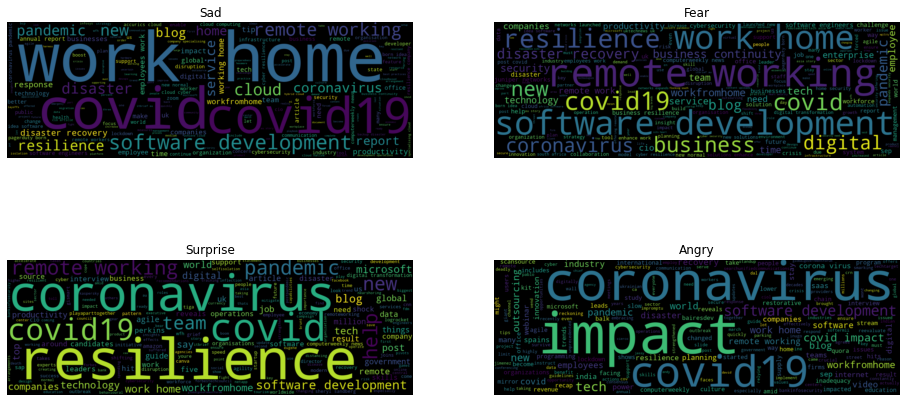

In [ ]:
# Wordplot for being angry,sad,emotional
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

fig, ax = plt.subplots(2, 2, figsize=(16, 8))
k=0
j=0
for i in ['Sad','Fear','Surprise','Angry']:
    dd=df[df['dominant_emotion']==i]
    text=" ".join(dd['text_context_true_wo_punct_clean'])
    wordcloud = WordCloud(width=1500, height=500).generate(text)
    ax[k,j].imshow(wordcloud, interpolation='bilinear')
    ax[k,j].set_title(i)
    ax[k, j].set_axis_off()
    j+=1
    if j>1:
        k+=1
        j=0

In [ ]:
#px.histogram(df,x='weekday',color='weekday',template='plotly_dark')
px.histogram(df,x='weekday',color='weekday')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import text2emotion as te
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import clear_output
import matplotlib.pyplot as plt
from raceplotly.plots import barplot

df1=pd.DataFrame()
df1['Emotion']=df['dominant_emotion']
df1['Day']=df['weekday']
df1['Count']=[1]*len(df)
grouped_data=df1.groupby(['Day','Emotion']).sum()
ind=np.array(list(grouped_data.index))
df2=pd.DataFrame()
df2['Day']=ind[:,0]
df2['Emotion']=ind[:,1]
df2['Count']=grouped_data.values
my_raceplot = barplot(df2,
                      item_column='Emotion',
                      value_column='Count',
                      time_column='Day')

my_raceplot.plot(title = 'Emotion in the dataframe',
                 item_label = 'Emotions',
                 value_label = 'Count (Total Count On That Day)',
                 frame_duration = 800)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# PNL - question-answering system

## Build an Open-Domain Question-Answering System With BERT and `ktrain`

We first install `ktrain` and load a dataset into a Python list. We use the [20 Newsgroups dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) in this example.

fonte:

- https://towardsdatascience.com/build-an-open-domain-question-answering-system-with-bert-in-3-lines-of-code-da0131bc516b

- https://nbviewer.jupyter.org/github/amaiya/ktrain/blob/master/examples/text/question_answering_with_bert.ipynb

- https://colab.research.google.com/drive/1tcsEQ7igx7lw_R0Pfpmsg9Wf3DEXyOvk

In [ ]:
df['text_context_true_wo_punct_clean'] = df['text_context_true_wo_punct_clean'].apply(str)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
docs = list(df['text_context_true_wo_punct_clean'].values.tolist())

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
docs

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['annual report cares ratings        ratings survey covid impact                    successfully enabled employees work home  focus   careratings   annual report annual 20report   web ',
 '  ways technology  helping fight coronavirus zsah connect organisations need development help voluntary web software development services offering tools covid19 data queries covid19   zsah net technology fight coronavirus',
 'sustainability report infosys operational resilience company one first response actions infosys creation dedicated covid19 core response team chaired   infosys  sustainability documents infosys sustainability report ',
 'facing covid19 thoughtworks chinas story thoughtworks embrace modern approach software development deliver value faster remote delivery models   thoughtworkers began work home plan move thoughtworks china teams remote working model helping clients recover build organizational resilience   thoughtworks  china covid video',
 '  responses coronavirus covid19 amalga

In [ ]:
type(docs)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



list

In [ ]:
import ktrain
from ktrain import text

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#INDEXDIR = '/content/drive/My Drive/covid19impact/data/03_multivocal/myindex_multivocal'
INDEXDIR =  '/home/eluis/workspace/covid19impact/data/03_multivocal/myindex_multivocal'

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### STEP 1: Create a Search Index

In [ ]:
text.SimpleQA.initialize_index(INDEXDIR)
text.SimpleQA.index_from_list(docs, INDEXDIR, commit_every=len(docs))

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### STEP 2: Create a QA instance
Next, we create a QA instance. This step will automatically download the BERT SQuAD model if it does not already exist on your system.

In [ ]:
qa = text.SimpleQA(INDEXDIR)

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



### STEP 3: Ask Questions
We will invoke the ask method to issue questions to the text corpus we indexed and retrieve answers. We will also use the qa.display method to nicely display the top 5 results in this Jupyter notebook. The answers are inferred using a BERT model fine-tuned on the SQuAD dataset. The model will comb through paragraphs and sentences to find candidate answers. By default, ask currently uses a batch_size of 8, but, if necessary, you can experiment with lowering it by setting the batch_size parameter. On a CPU, for instance, you may want to try batch_size=1.


##### Space Question

In [ ]:
answers = qa.ask('There are covid impact?')
qa.display_answers(answers[:2])

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
answers = qa.ask('There are home work impact?')
qa.display_answers(answers[:2])

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
answers = qa.ask('There are software engineers impact?')
qa.display_answers(answers[:2])

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Output

In [ ]:
df.to_csv('/home/eluis/workspace/covid19impact/data/03_multivocal/step03_pnl_multivocal_v1.csv', sep="|", encoding='UTF-8')

/home/eluis/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

